# Create Model Predictive for Credit Loan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\IDX Partners\Final Task\loan_data_2007_2014.csv')

# Data Understanding

In [3]:
print(f'Shape of the dataset: {df.shape}')
df.head()

Shape of the dataset: (466285, 75)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
number_rows = df['id'].nunique()
number_unique = df['member_id'].nunique()

if number_rows == number_unique:
    print('Every rows represents a unique member')

else:
    print('There are duplicate members in the dataset')

Every rows represents a unique member


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Many features have missing values

## Drop Unnecessary Features

In [6]:
cols_drop = ['Unnamed: 0', 'id', 'member_id', 'url', 'desc', 'zip_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m',
             'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
             'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'sub_grade']

df.drop(cols_drop, axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

# Feature Engineering

## Defining Dependent Variable

In [7]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

If we look at the loan_status, we can determine whether the customer's loan status can be seen as good or bad. <br>

**Bad label** is given if the loan status includes: <br>
- "Charged Off": The process by which creditors write off uncollectible debts from their account books as losses
- "Default": Default
- "Late (31 - 120 days)": Late payment within 31 - 120 days
- "In Grace Period": The due date on which the customer can pay without being charged a penalty
- "Late (16-30 days)": Late payment within 16 - 30 days
- "Does not meet the credit policy. Status: Charged Off": The loan does not meet normal credit policy standards, but is still granted and turns out to be Charged Off.

**Good Label** is given if the borrower's status includes: <br>
- "Fully Paid": The loan has been paid in full
- "Current": Still running well
- "Does not meet the credit policy. Status: Fully Paid": The loan does not meet the normal credit policy standards, but is still given and it turns out that the customer is able to repay the loan well.

In [8]:
def create_loan_label(status):
    bad_status = ['Charged Off', 'Default', 'Late (31-120 days)',
                  'In Grace Period', 'Late (16-30 days)', 
                  'Does not meet the credit policy. Status:Charged Off']
    
    if status in bad_status:
        return 'Bad Loans'
    else:
        return 'Good Loans'

df['credit_flag'] = df['loan_status'].apply(create_loan_label)


In [9]:
round(df['credit_flag'].value_counts([0])*100, 2)

credit_flag
Good Loans    88.13
Bad Loans     11.87
Name: proportion, dtype: float64

## Data Cleaning

In [10]:
def check_unique_value(df):
    for i in df.columns:
        print(f"{i} \n {np.sort(df[i].unique())} \n")

# check_unique_value(df)

In [11]:
# emp_lenght
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
df['emp_length_int'] = df['emp_length'].str.extract(r'(\d+)').astype(float) # str.extract(r'(\d+)') extracts the numeric digits from the string
df['emp_length_int'].unique()

array([10.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [13]:
df.drop('emp_length', axis=1, inplace=True)

In [14]:
# term
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [15]:
df['term_int'] = df['term'].str.extract(r'(\d+)').astype(float) #extracts the numeric digits from the string
df['term_int'].unique()

array([36., 60.])

In [16]:
df.drop('term', axis=1, inplace=True)

In [17]:
# earliest_cr_line
df['earliest_cr_line'].sample(3)

257411    Feb-95
17745     Oct-96
58297     Jul-92
Name: earliest_cr_line, dtype: object

In [18]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_date'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [19]:
# Calculate the number of months since earliest credit line to reference date
df['mnths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']).dt.days // 30 
df['mnths_since_earliest_cr_line'].head()

0    400.0
1    227.0
2    195.0
3    265.0
4    266.0
Name: mnths_since_earliest_cr_line, dtype: float64

In [20]:
df['mnths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.497130
std          95.353324
min        -621.000000
25%         185.000000
50%         228.000000
75%         289.000000
max         595.000000
Name: mnths_since_earliest_cr_line, dtype: float64

In [21]:
print(df[df['mnths_since_earliest_cr_line'] < 0] [['earliest_cr_line', 'earliest_cr_line_date', 'mnths_since_earliest_cr_line']].head(3))

     earliest_cr_line earliest_cr_line_date  mnths_since_earliest_cr_line
1580           Sep-62            2062-09-01                        -545.0
1770           Sep-68            2068-09-01                        -618.0
2799           Sep-64            2064-09-01                        -570.0


The minus (-) is because python incorrectly interpreted year '62 as 2062, not 1962.

In [22]:
def custom_date_parser(x):
    dt = pd.to_datetime(x, format='%b-%y')
    # If year is in the future (e.g., > 2025), subtract 100 years
    if dt.year > 2025:
        dt = dt.replace(year=dt.year - 100)
    return dt

df['earliest_cr_line_date'] = df['earliest_cr_line'].apply(custom_date_parser)

"> 2025" meaning every year that above 2025 will be subtracted 100 years

In [23]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df.loc[df['earliest_cr_line_date'] > pd.Timestamp('2024-12-31'), 'earliest_cr_line_date'] -= pd.DateOffset(years=100)

In [24]:
# Calculate the number of months since earliest credit line to reference date
df['mnths_since_earliest_cr_line'] = (pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']).dt.days // 30 
df['mnths_since_earliest_cr_line'].head()

0    400.0
1    227.0
2    195.0
3    265.0
4    266.0
Name: mnths_since_earliest_cr_line, dtype: float64

In [25]:
df['mnths_since_earliest_cr_line'].describe()

count    466256.000000
mean        245.549331
std          88.206273
min          74.000000
25%         186.000000
50%         229.000000
75%         289.000000
max         899.000000
Name: mnths_since_earliest_cr_line, dtype: float64

In [26]:
print(df[df['mnths_since_earliest_cr_line'] < 0] [['earliest_cr_line', 'earliest_cr_line_date', 'mnths_since_earliest_cr_line']].head(3))

Empty DataFrame
Columns: [earliest_cr_line, earliest_cr_line_date, mnths_since_earliest_cr_line]
Index: []


In [27]:
print(df[df['mnths_since_earliest_cr_line'] > 0] [['earliest_cr_line', 'earliest_cr_line_date', 'mnths_since_earliest_cr_line']].head(3))

  earliest_cr_line earliest_cr_line_date  mnths_since_earliest_cr_line
0           Jan-85            1985-01-01                         400.0
1           Apr-99            1999-04-01                         227.0
2           Nov-01            2001-11-01                         195.0


In [28]:
df.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

The years are now fixed

In [29]:
# issue_d
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format='%b-%y')

In [30]:
df['mnths_since_issue_d'] = ((pd.to_datetime('2017-12-01') - df['issue_d_date'])).dt.days // 30

In [31]:
df['mnths_since_issue_d'].describe() 

count    466285.000000
mean         51.377947
std          14.601819
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         127.000000
Name: mnths_since_issue_d, dtype: float64

In [32]:
df.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

In [33]:
# last_pymnt_d
df['last_pymnt_d_date'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')

In [34]:
df['mnths_since_last_pymnt_d'] = ((pd.to_datetime('2017-12-01') - df['last_pymnt_d_date'])).dt.days // 30

In [35]:
df['mnths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.323151
std          12.917952
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         121.000000
Name: mnths_since_last_pymnt_d, dtype: float64

In [36]:
df.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

In [37]:
# next_pymnt_d
df['next_pymnt_d_date'] = pd.to_datetime(df['next_pymnt_d'], format='%b-%y')

In [38]:
df['mnths_since_next_pymnt_d'] = ((pd.to_datetime('2017-12-01') - df['next_pymnt_d_date'])).dt.days // 30
df['mnths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.746372
std           6.166840
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         121.000000
Name: mnths_since_next_pymnt_d, dtype: float64

In [39]:
df.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

In [40]:
# last_credit_pull_d
df['last_credit_pull_d_date'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['mnths_since_last_credit_pull_d'] = ((pd.to_datetime('2017-12-01') - df['last_credit_pull_d_date'])).dt.days // 30
df['mnths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.058911
std           9.708915
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         128.000000
Name: mnths_since_last_credit_pull_d, dtype: float64

In [41]:
df.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# Exploratory Data Analysis

## Check Number of Unique Values

In [42]:
# Categorical Features
df.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
loan_status                 9
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
credit_flag                 2
dtype: int64

In [43]:
df.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [44]:
# Numerical Features
df.select_dtypes(exclude='object').nunique()

loan_amnt                           1352
funded_amnt                         1354
funded_amnt_inv                     9854
int_rate                             506
installment                        55622
annual_inc                         31901
dti                                 3997
delinq_2yrs                           24
inq_last_6mths                        28
mths_since_last_delinq               145
mths_since_last_record               123
open_acc                              62
pub_rec                               26
revol_bal                          58142
revol_util                          1269
total_acc                            112
out_prncp                         135665
out_prncp_inv                     141189
total_pymnt                       351609
total_pymnt_inv                   347659
total_rec_prncp                   172713
total_rec_int                     270249
total_rec_late_fee                  5808
recoveries                         22773
collection_recov

In [45]:
df.drop(['funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
         'total_rec_int', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code'], axis=1, inplace=True)

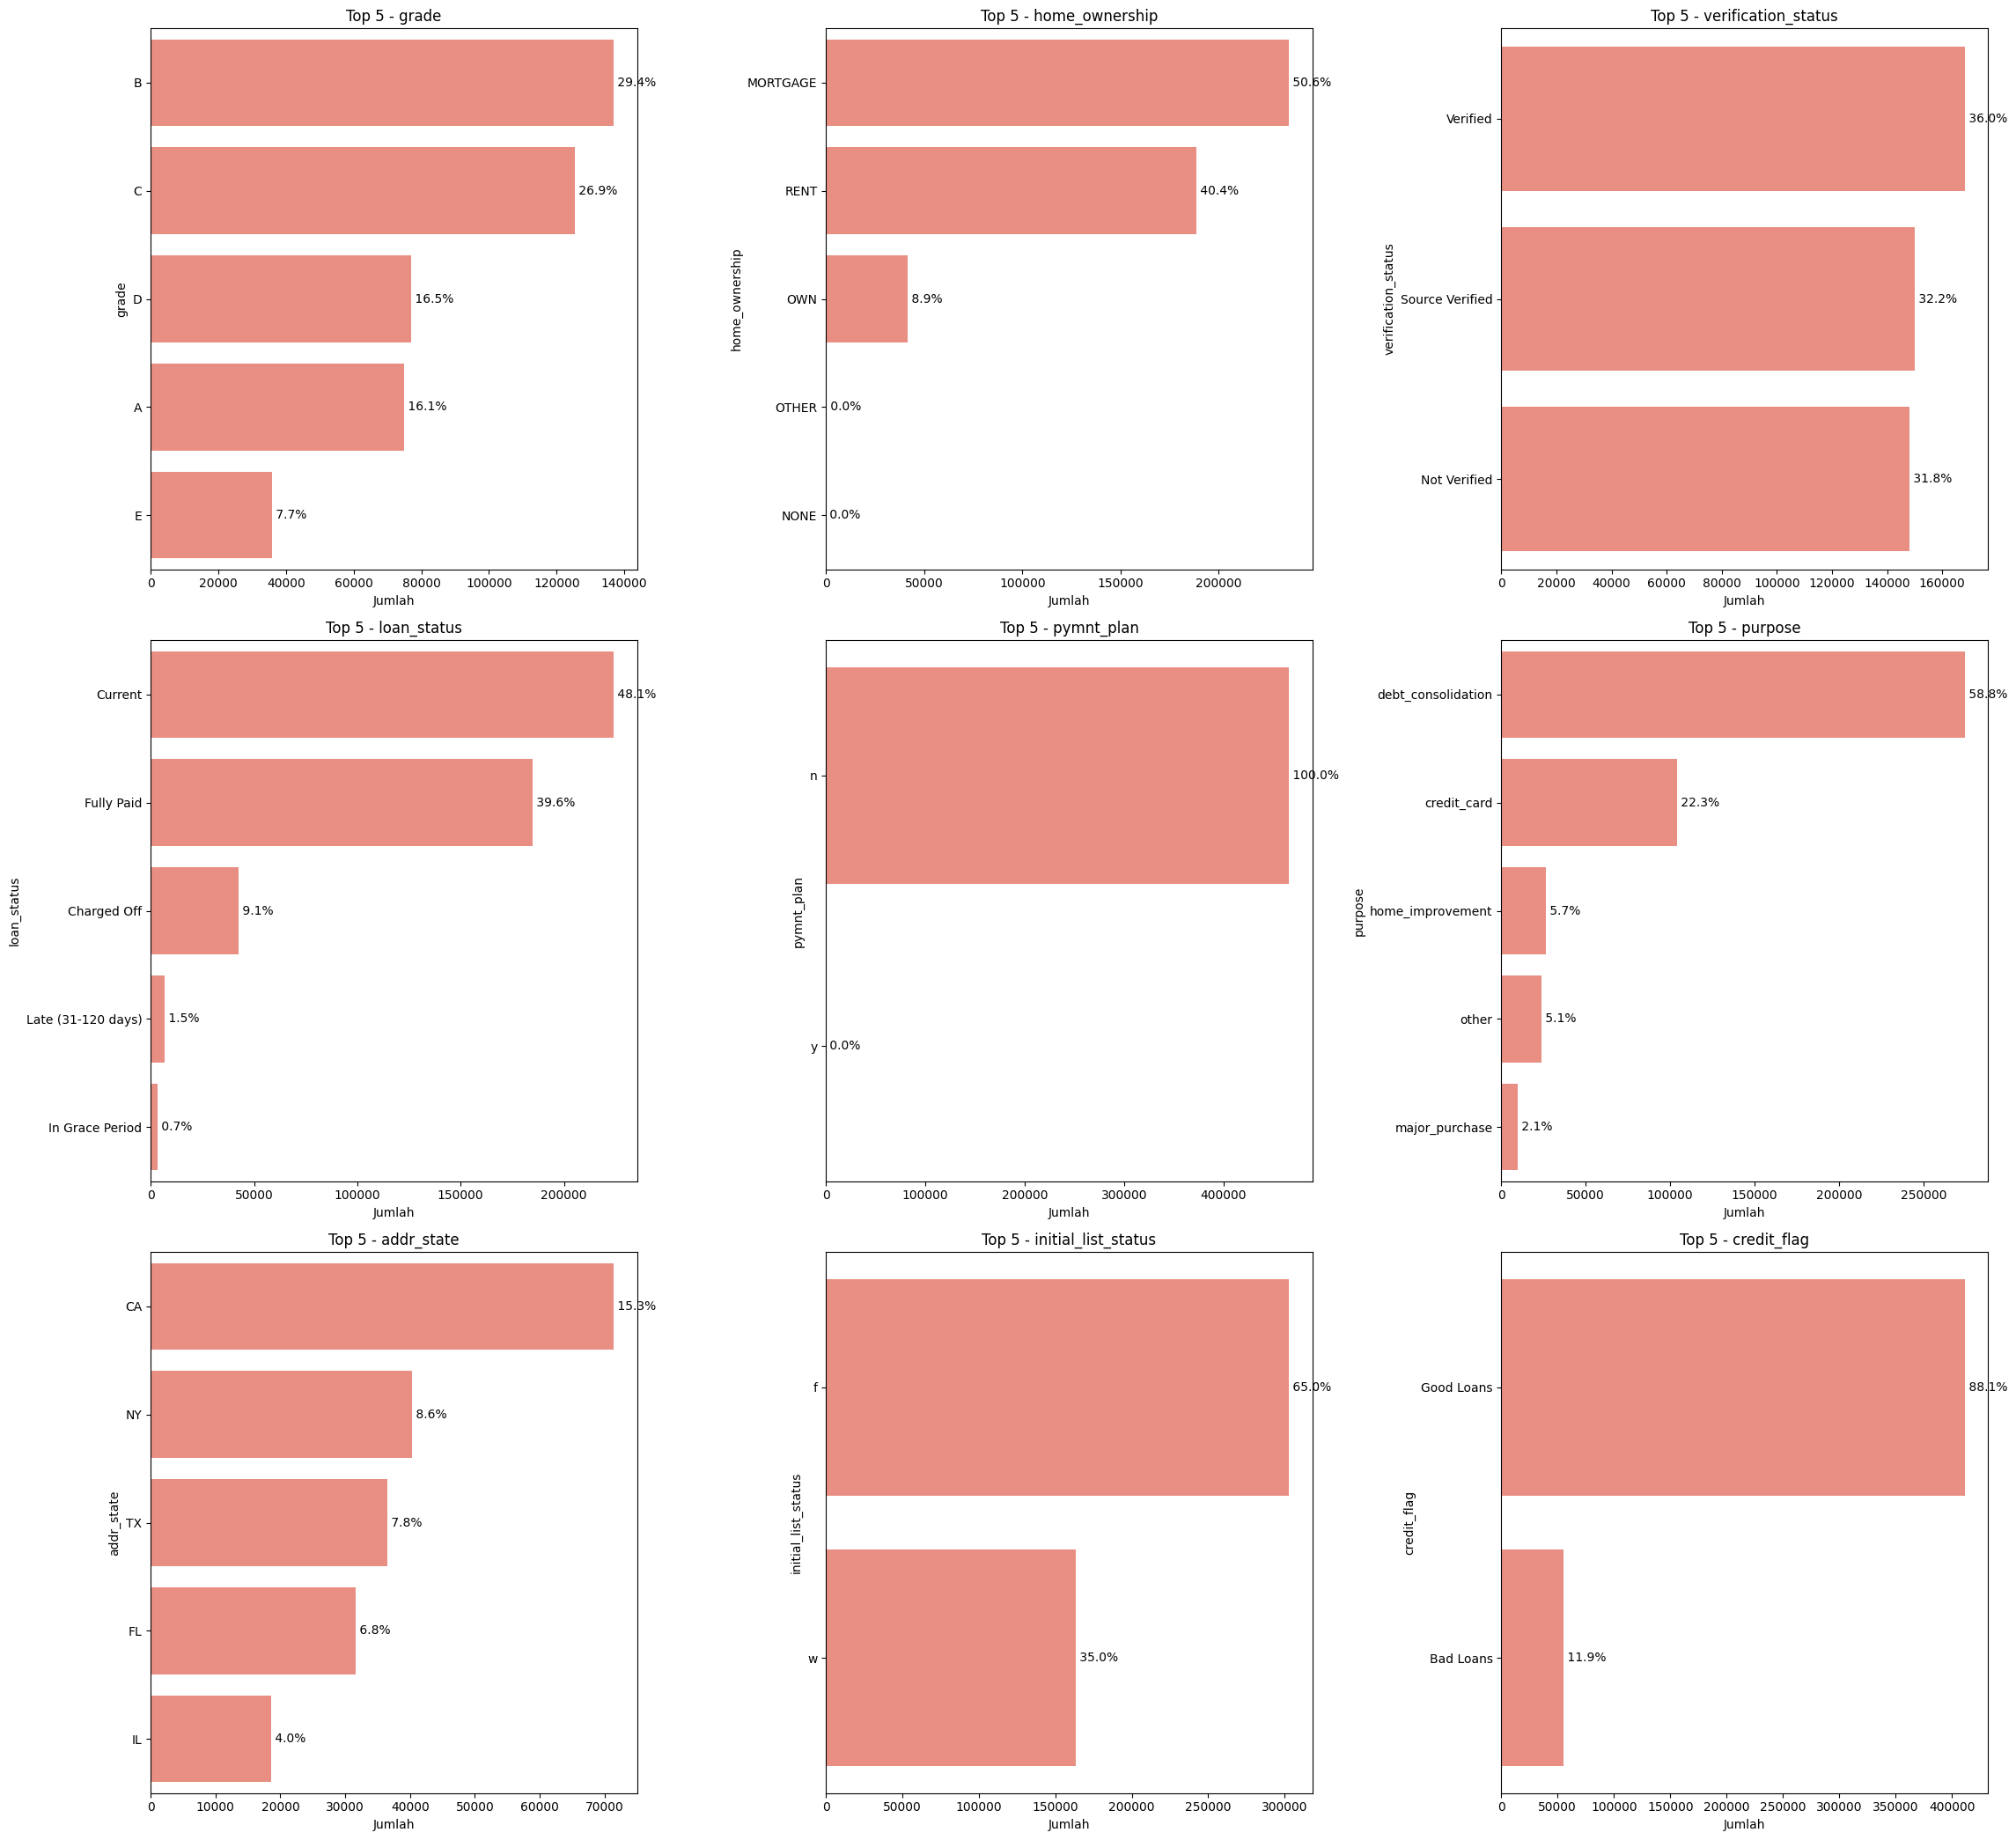

In [46]:
categorical_cols = df.select_dtypes('object').columns

num_cols = 3
num_rows = (len(categorical_cols) // num_cols) + (len(categorical_cols) % num_cols > 0)

plt.figure(figsize=(23, num_rows * 7))

for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Menghitung persentase
    value_counts = df[col].value_counts().head(5)
    total = len(df)
    percentages = (value_counts / total * 100).round(1)
    
    # Memotong teks yang terlalu panjang
    shortened_index = [str(x)[:30] + '...' if len(str(x)) > 30 else str(x) for x in value_counts.index]
    
    # Membuat barplot dengan label persentase
    ax = sns.barplot(x=value_counts.values, y=shortened_index, color='salmon')
    
    # Menambahkan label persentase di ujung bar
    for j, v in enumerate(value_counts.values):
        ax.text(v, j, f' {percentages[j]}%', va='center')
    
    plt.title(f'Top 5 - {col}')
    plt.xlabel('Jumlah')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()


In [47]:
df['pymnt_plan'].value_counts()

pymnt_plan
n    466276
y         9
Name: count, dtype: int64

In [48]:
df.drop(['pymnt_plan'], axis=1, inplace=True)

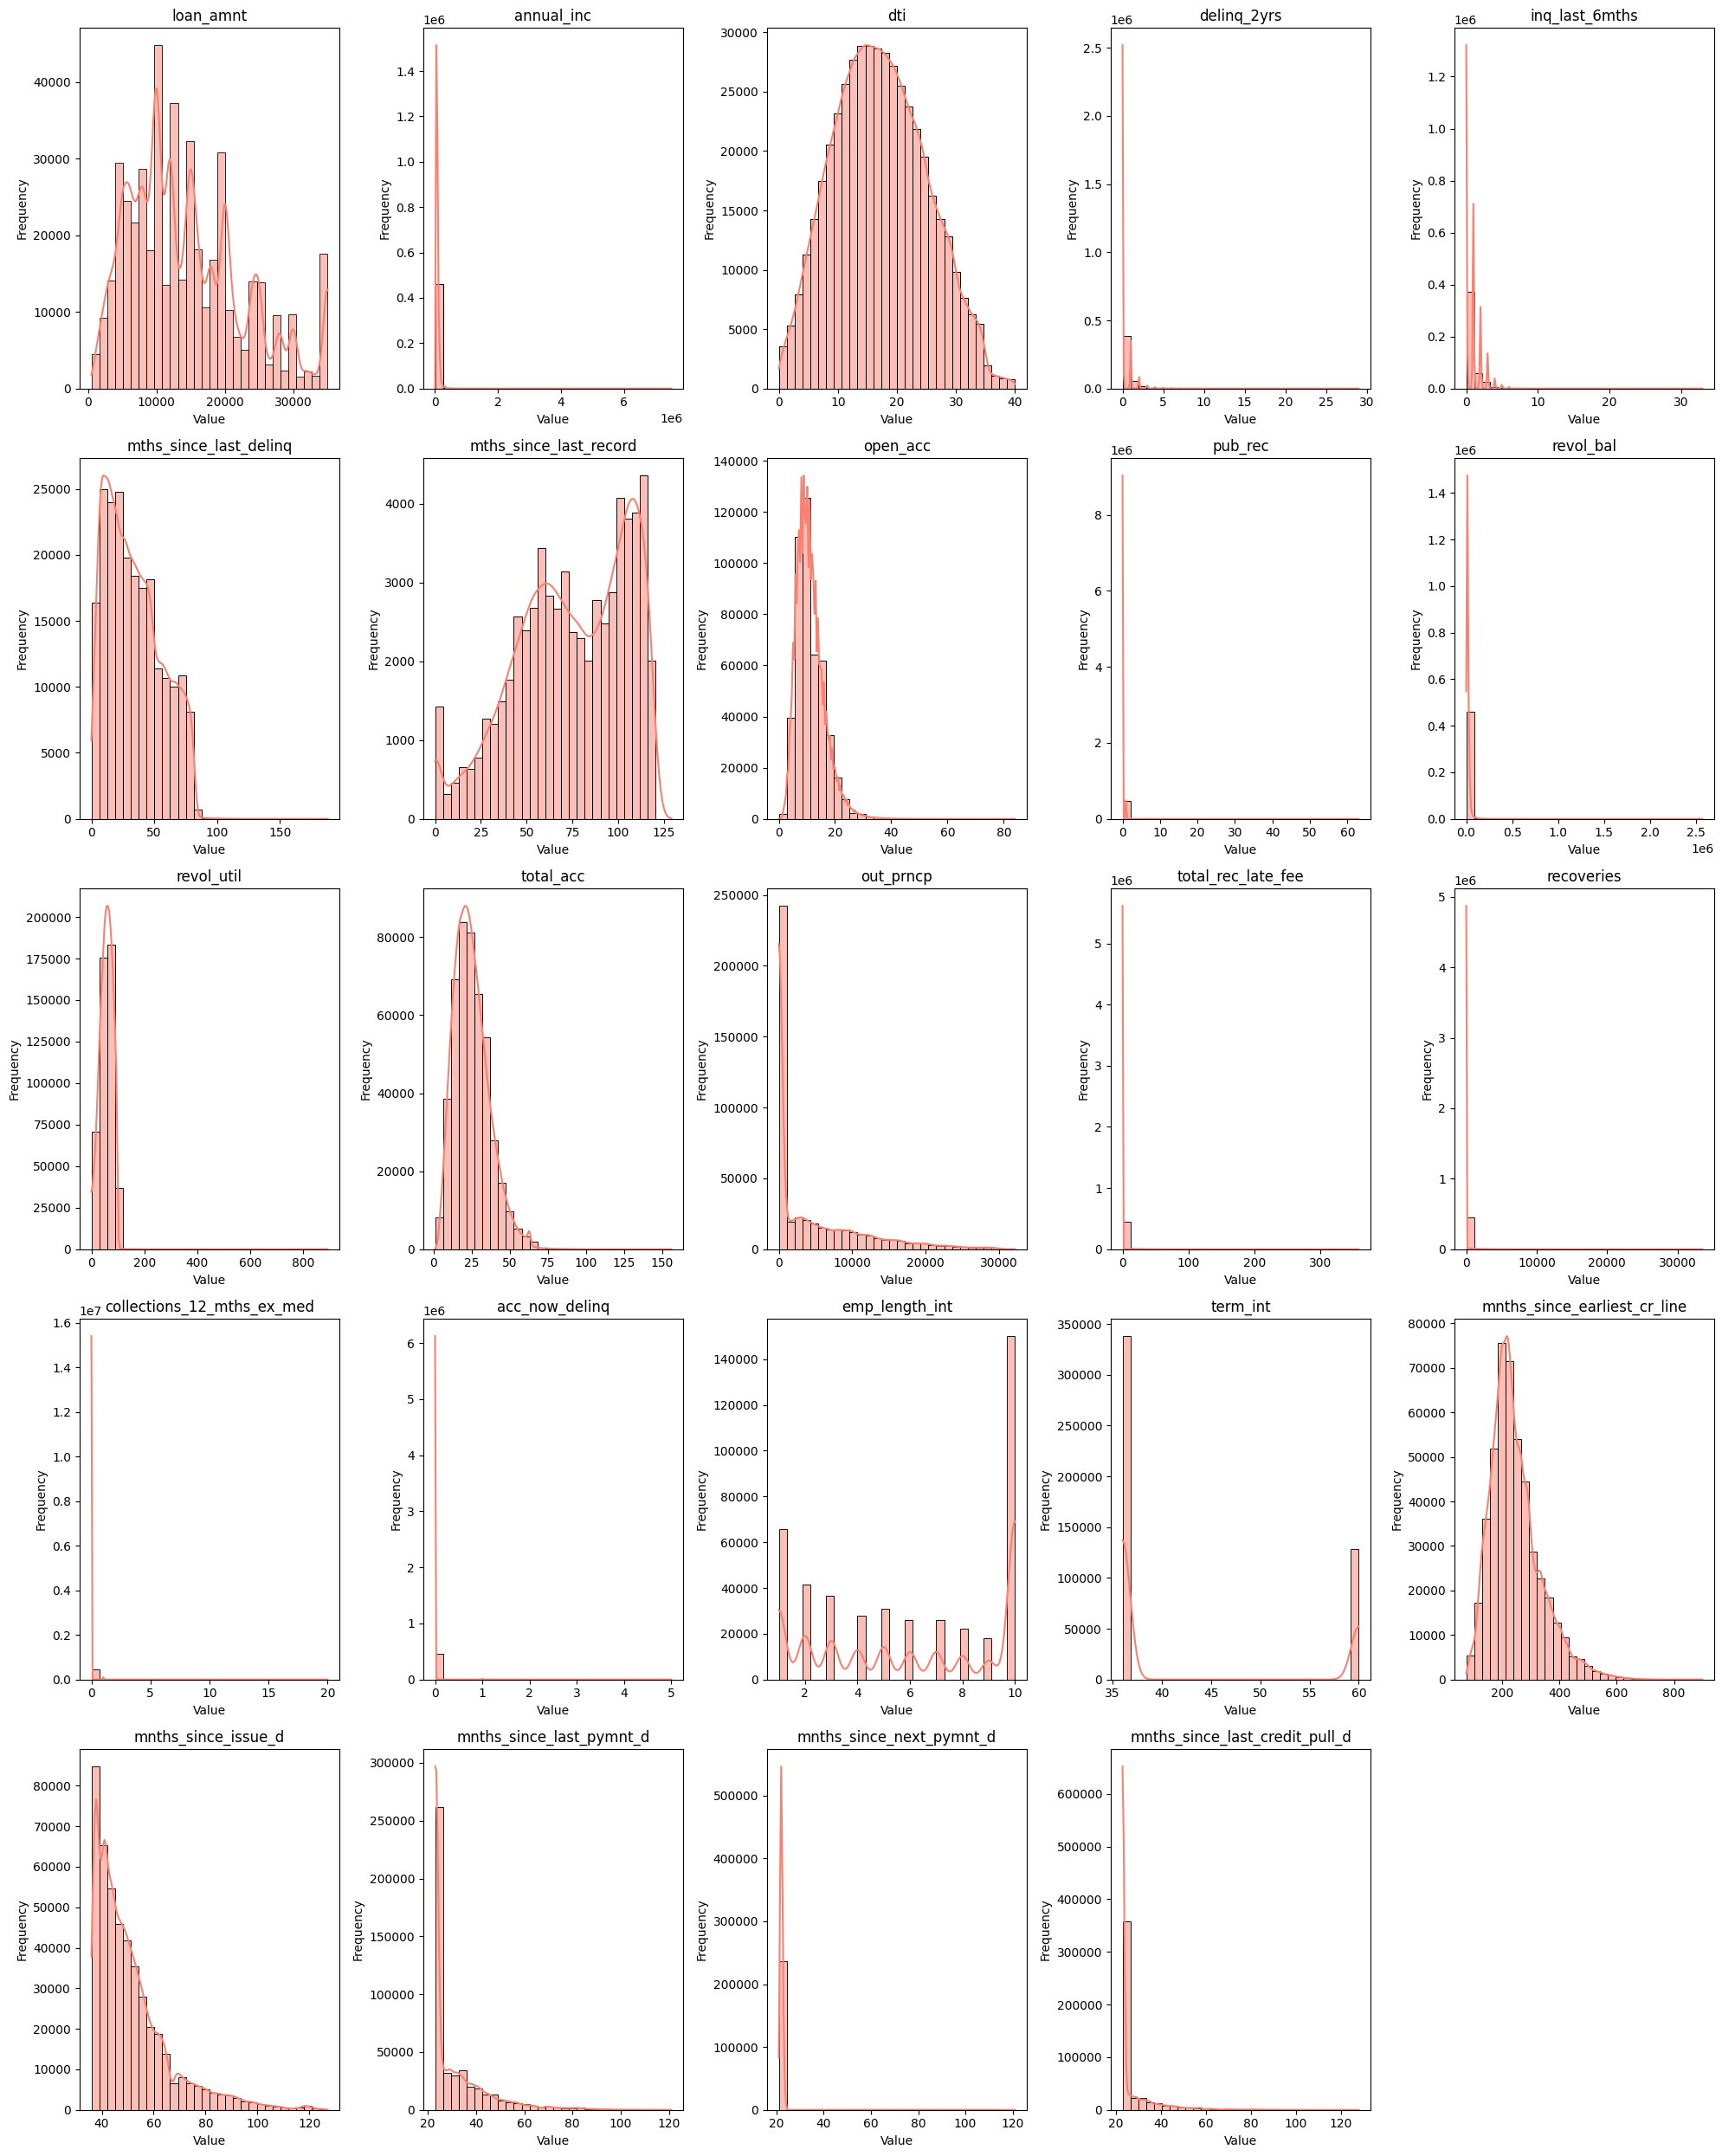

In [49]:
numerical_cols = df.select_dtypes(['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color='salmon')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.tight_layout() 

plt.show()

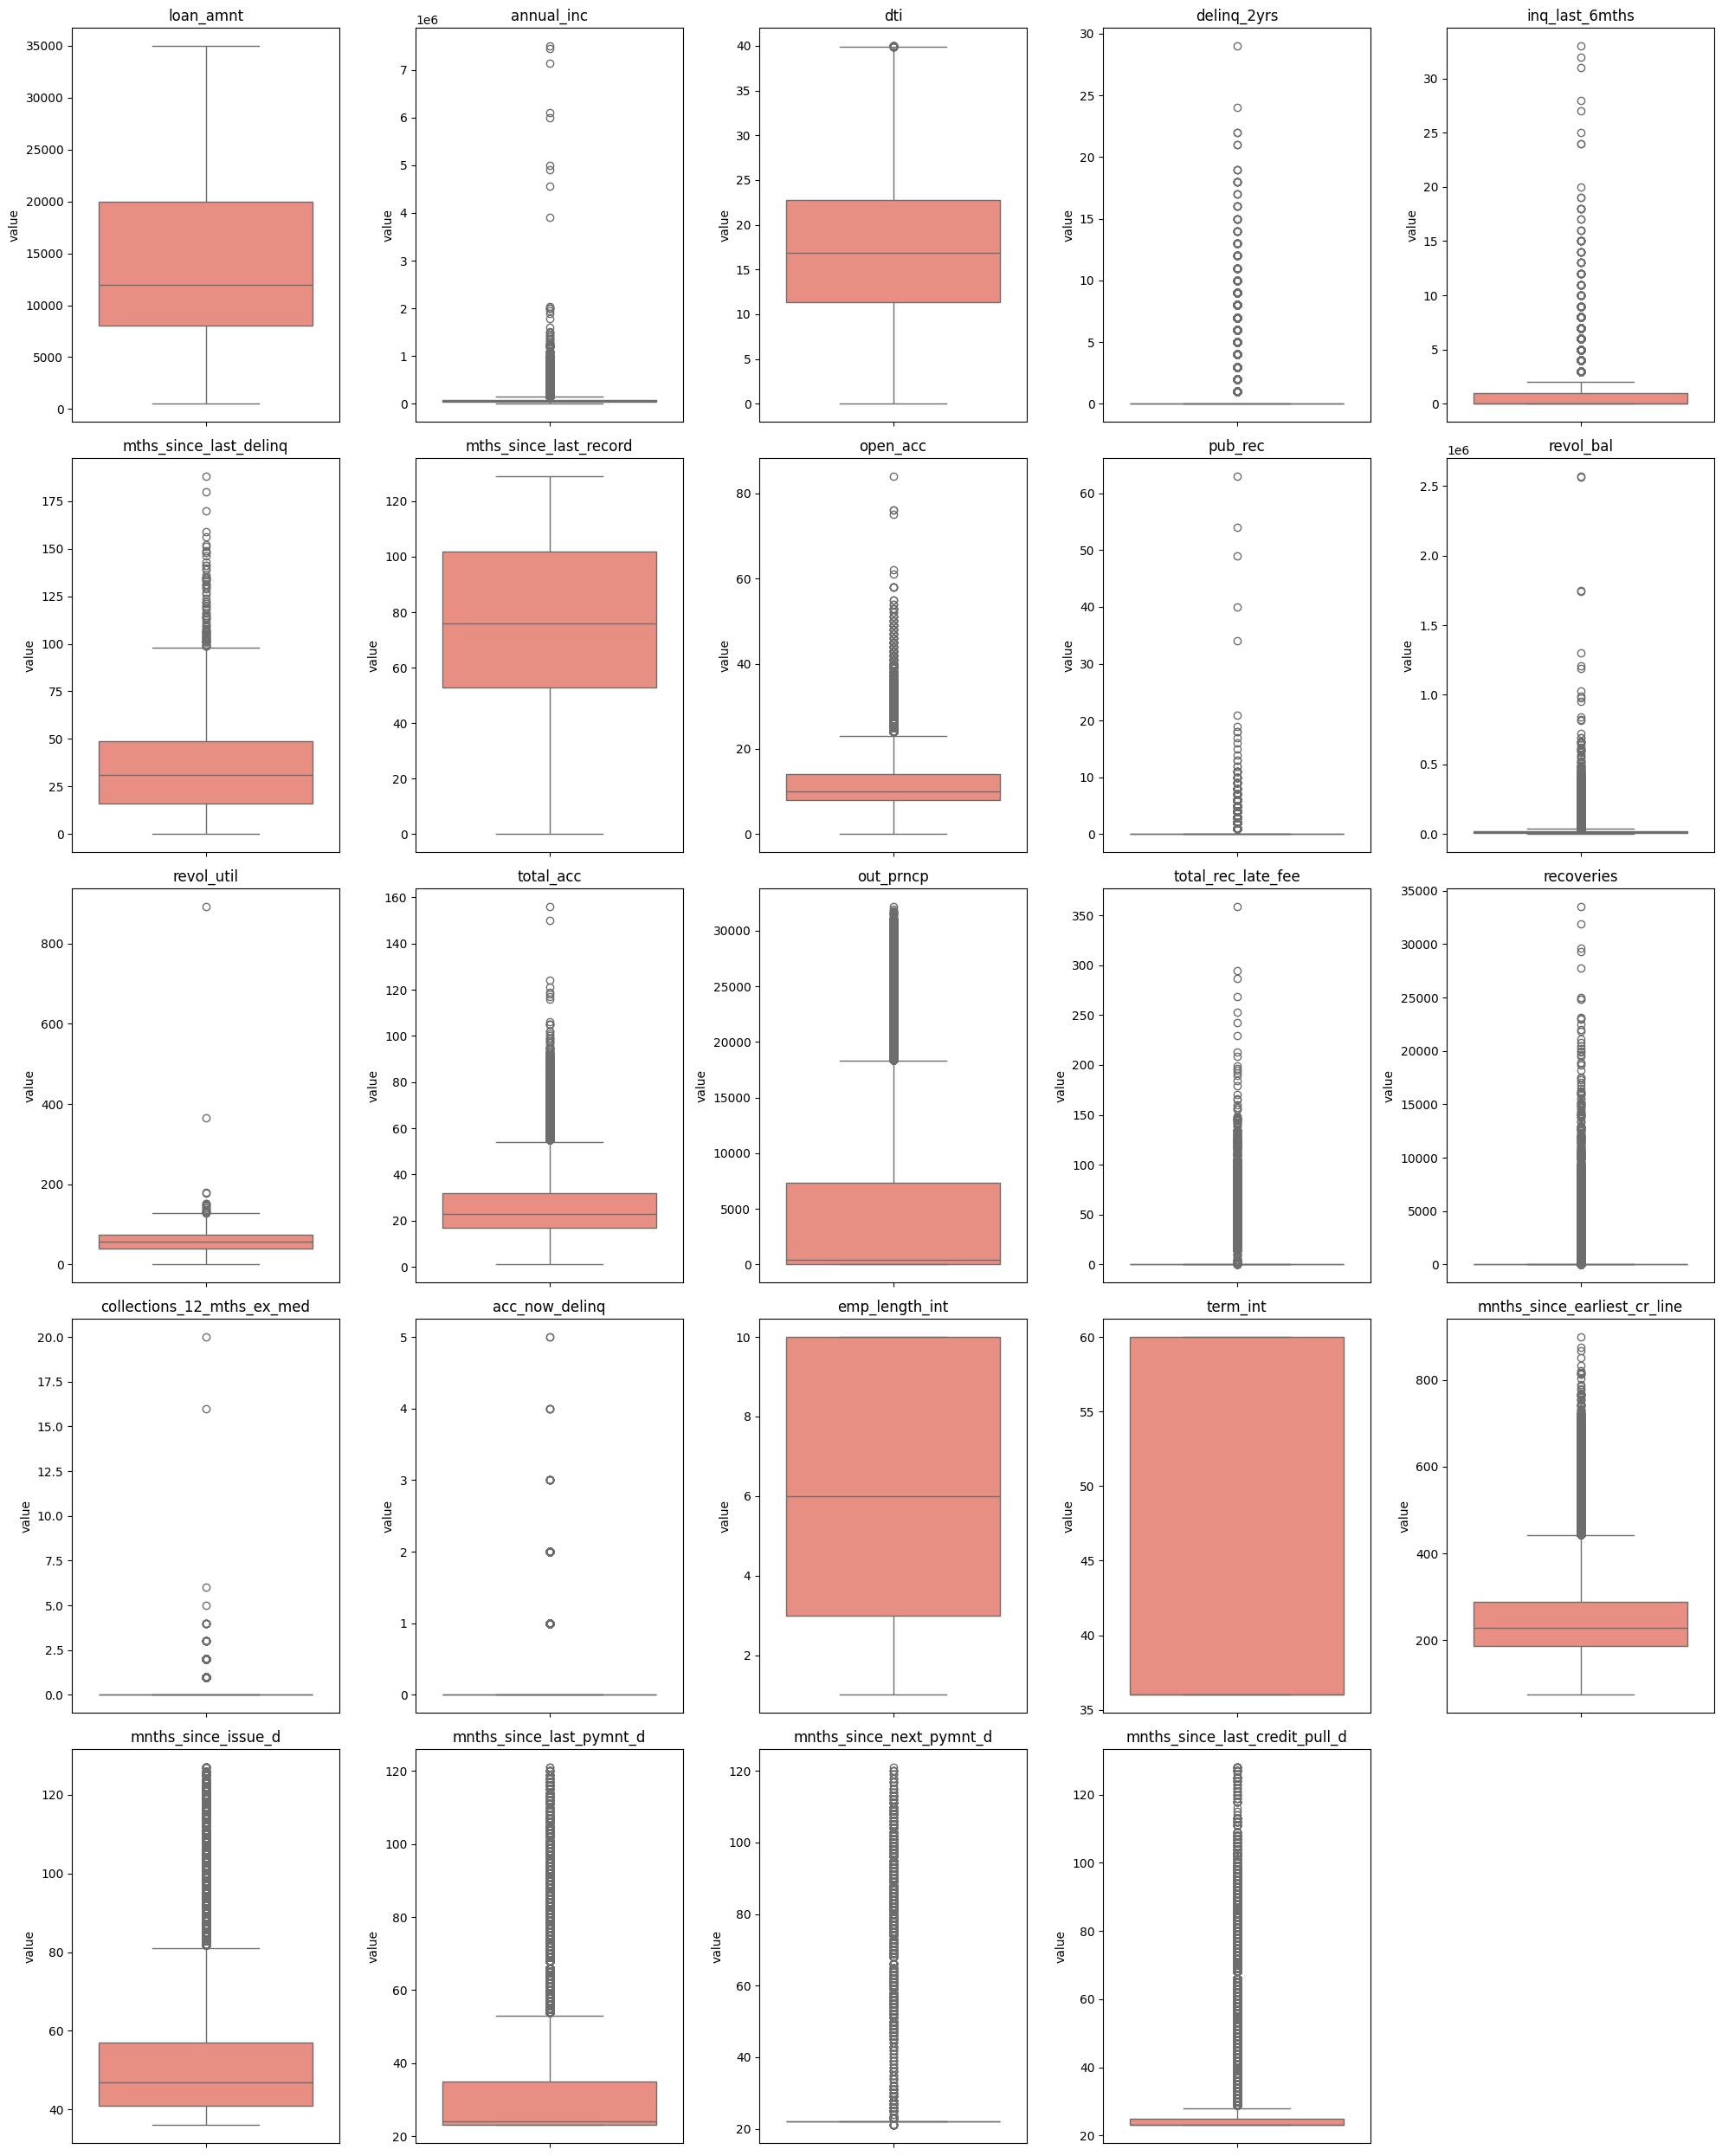

In [50]:
numerical_cols = df.select_dtypes(['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_cols) // num_cols) + (len(numerical_cols) % num_cols > 0)

plt.figure(figsize=(20, num_rows * 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col], color='salmon')
    plt.title(col)
    plt.ylabel('value')
    plt.tight_layout() 

plt.show()

## Multivariate Analysis

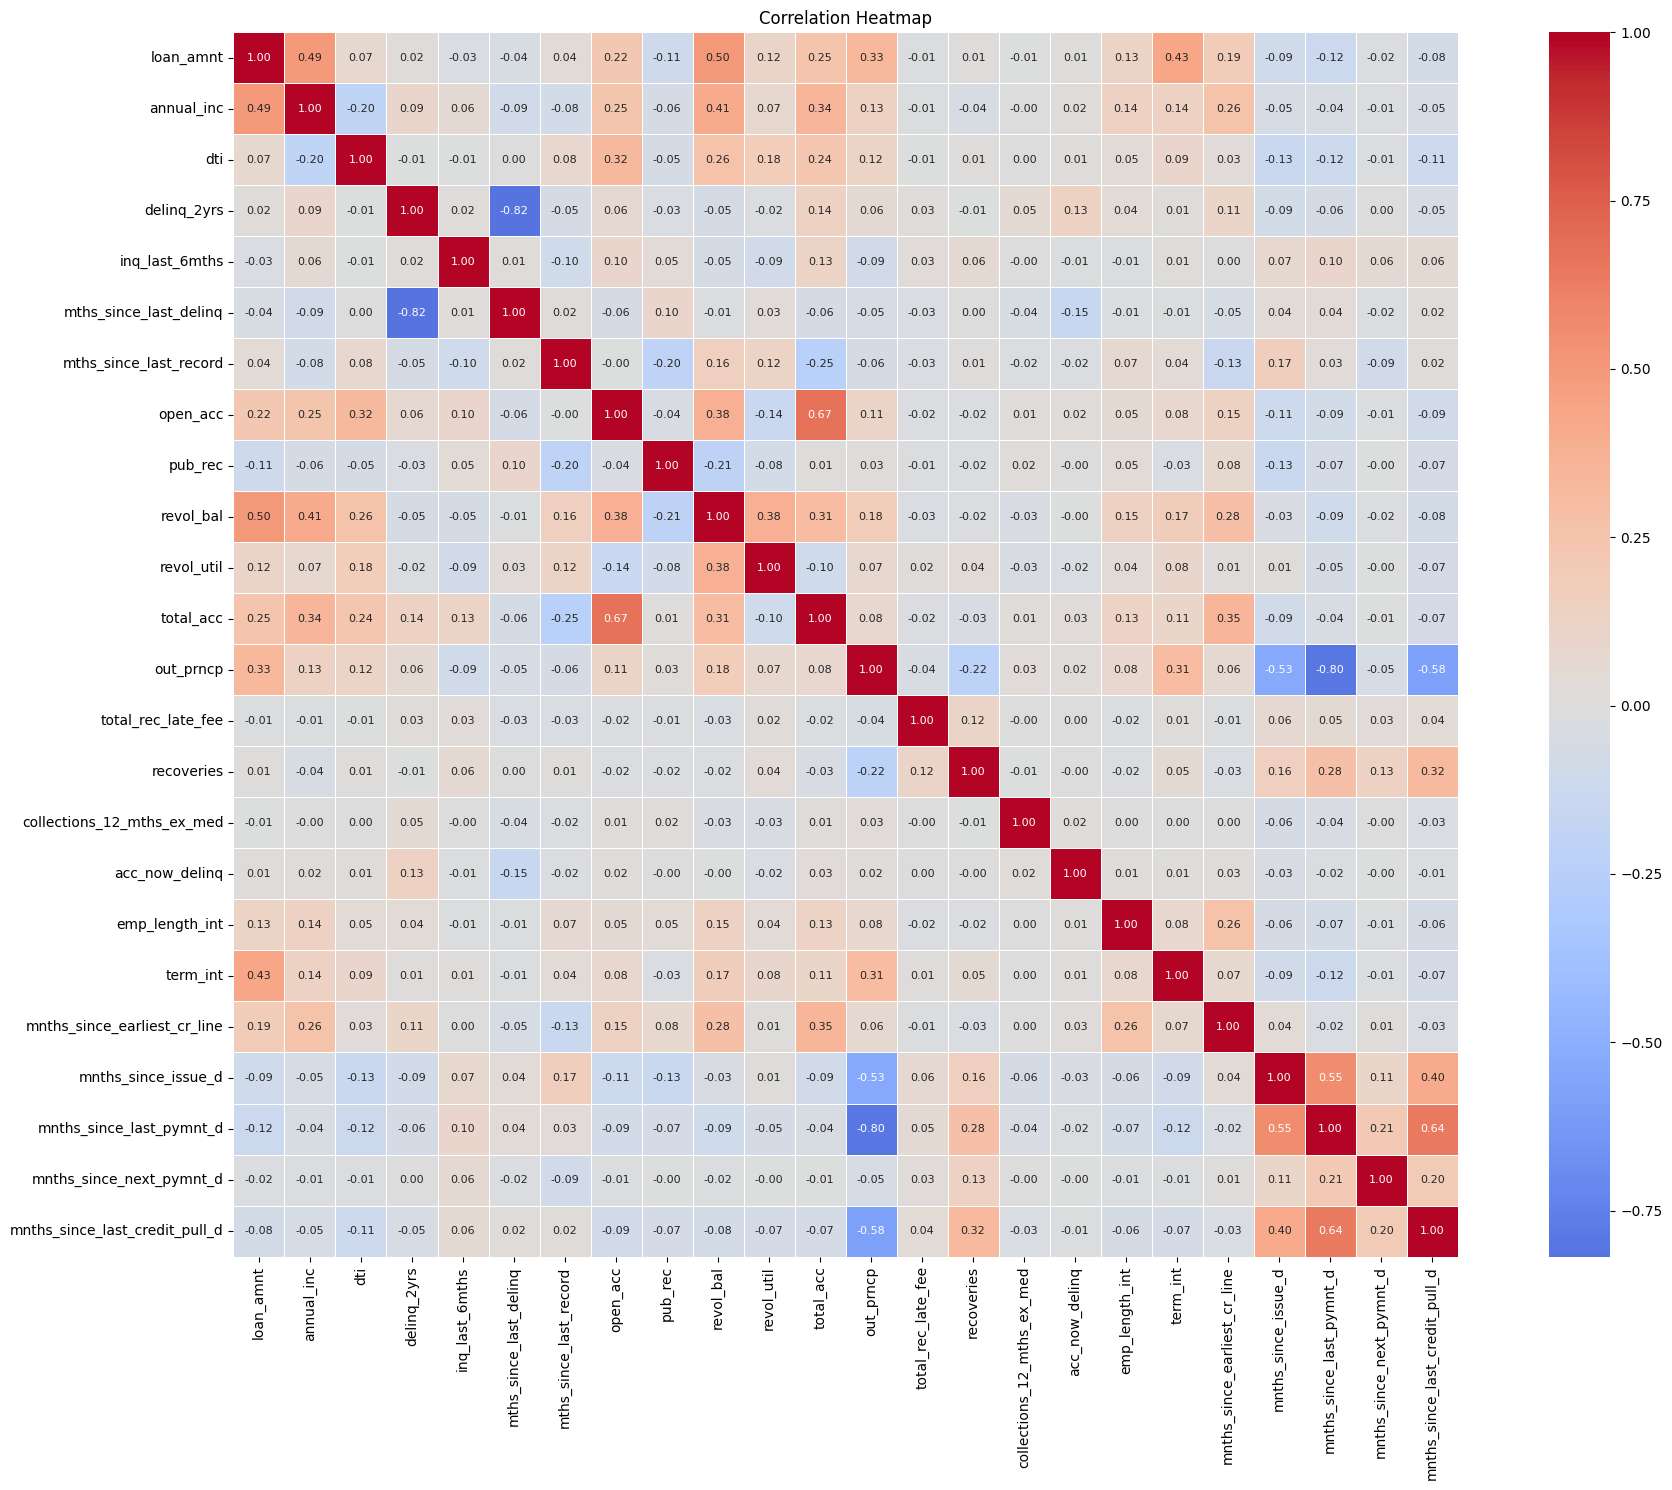

In [51]:
# Heatmap
plt.figure(figsize=(20, 15))
correlation_matrix = df[numerical_cols].corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, annot_kws={'size': 8},
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Data Analysis

In [52]:
df_da = pd.read_csv(r'C:\Users\aldiv\Downloads\Data Analyst\Project based intern\IDX Partners\Final Task\loan_data_2007_2014.csv')
def create_loan_label(status):
    bad_status = ['Charged Off', 'Default', 'Late (31-120 days)',
                  'In Grace Period', 'Late (16-30 days)', 
                  'Does not meet the credit policy. Status:Charged Off']
    
    if status in bad_status:
        return 'Bad Loans'
    else:
        return 'Good Loans'

df_da['credit_flag'] = df_da['loan_status'].apply(create_loan_label)


### Credit Flag Proportion

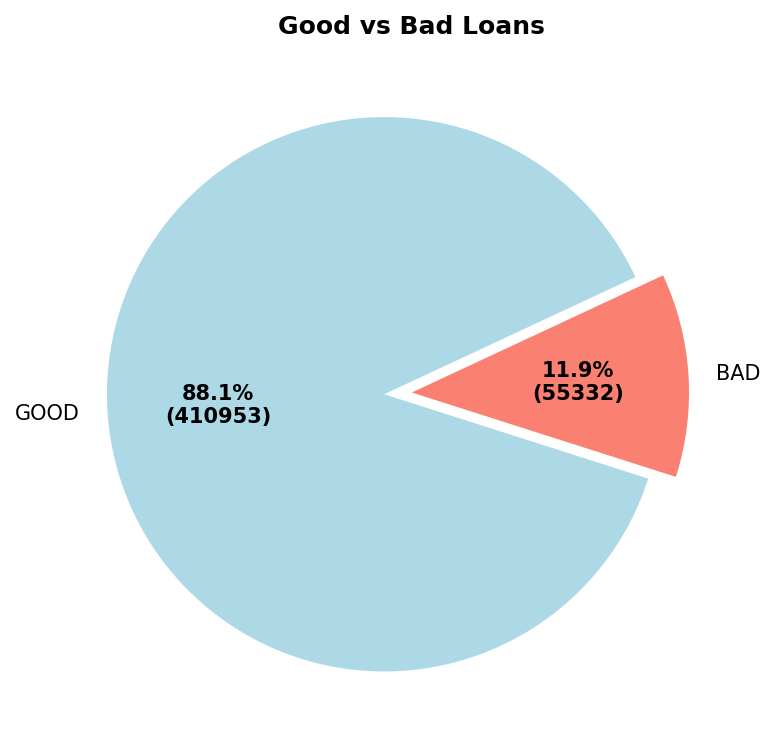

Number of clients with a Good credit: 410953, (88.1%)
Number of clients with a Bad credit: 55332, (11.9%)


In [53]:
y_value_counts = df_da['credit_flag'].value_counts()

# Menyiapkan data untuk pie chart
recipe = ["GOOD", "BAD"]
data = [y_value_counts[0], y_value_counts[1]]

# Membuat pie chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=150)
# sns.set_palette("Accent")
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:d})'
    return my_autopct

wedges, texts, autotexts = ax.pie(data, 
                                  labels=recipe,
                                  explode=[0.1,0],
                                  autopct=make_autopct(data),
                                  colors=["lightblue","salmon"],
                                  startangle=25)
                                  

# Mengatur properti teks
plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Good vs Bad Loans", weight="bold")

plt.show()

# Mencetak informasi tambahan
print(f"Number of clients with a Good credit: {y_value_counts[0]}, ({y_value_counts[0]/(y_value_counts[1]+y_value_counts[0])*100:.1f}%)")
print(f"Number of clients with a Bad credit: {y_value_counts[1]}, ({y_value_counts[1]/(y_value_counts[1]+y_value_counts[0])*100:.1f}%)")

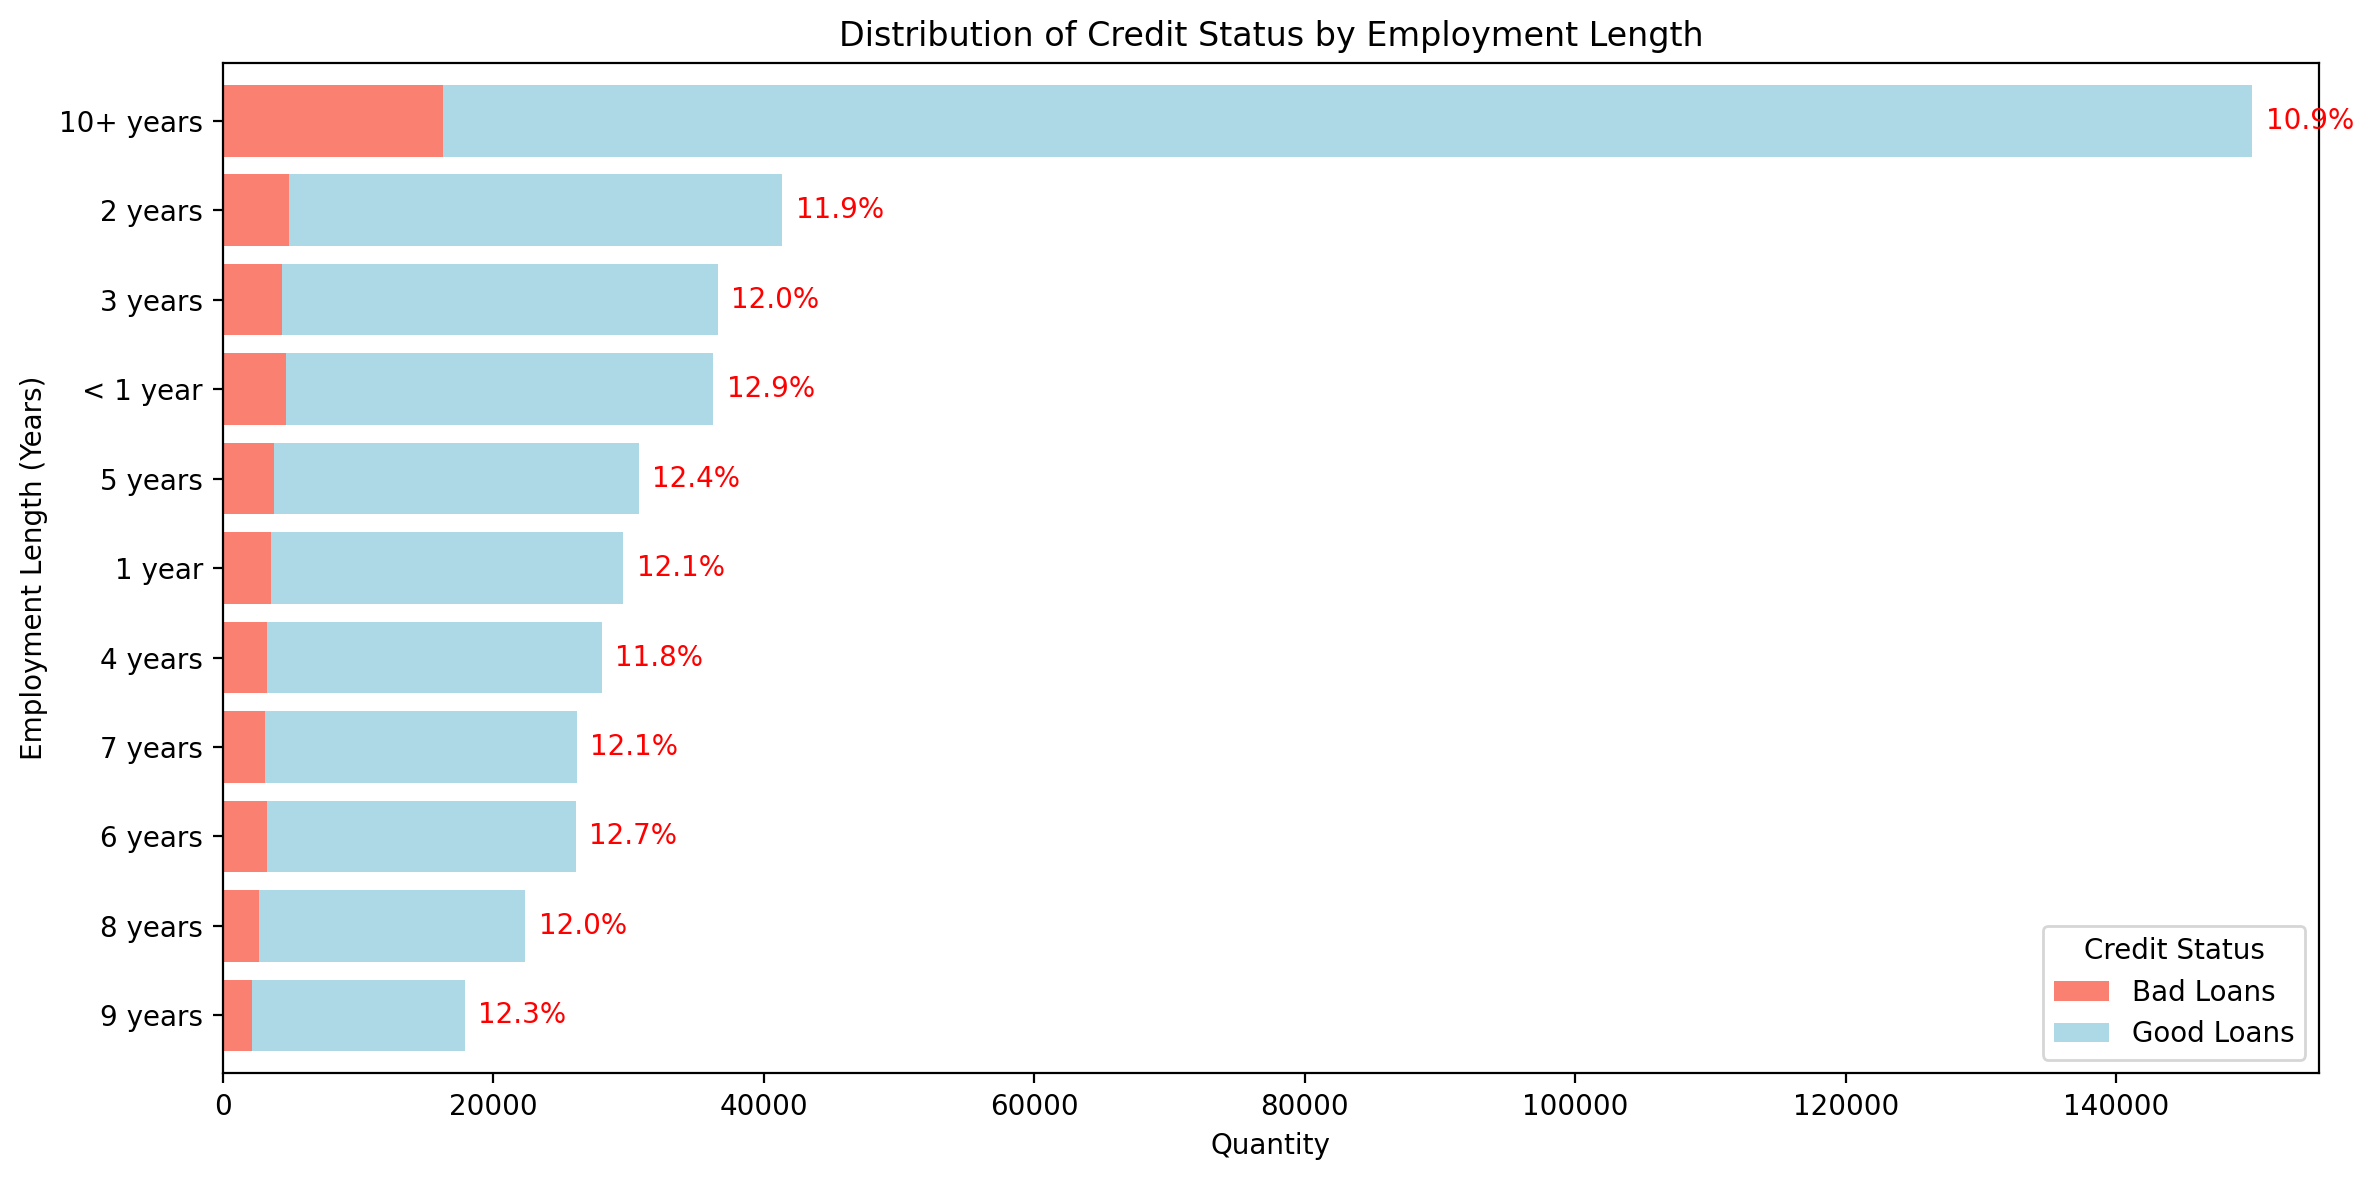

credit_flag,Bad Loans,Good Loans,Bad%,Good%
emp_length,,,,
10+ years,16308,133741,10.868450,89.131550
2 years,4937,36436,11.932903,88.067097
< 1 year,4663,31602,12.858128,87.141872
3 years,4393,32203,12.004044,87.995956
5 years,3811,26963,12.383831,87.616169
1 year,3588,26034,12.112619,87.887381
6 years,3312,22800,12.683824,87.316176
4 years,3312,24711,11.818863,88.181137
7 years,3165,23015,12.089381,87.910619


In [54]:
# Calculate TARGET counts by emp_length
emp_target_counts = df_da.groupby(['emp_length', 'credit_flag']).size().unstack(fill_value=0) 
emp_target_counts['Total'] = emp_target_counts.sum(axis=1)
emp_target_counts = emp_target_counts.sort_values(by='Total', ascending=True)

emp_target_counts_plot = emp_target_counts.sort_values(by='Total', ascending=True)
emp_target_counts = emp_target_counts.drop(columns='Total')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
emp_target_counts.plot(kind='barh', stacked=True, color=['salmon', 'lightblue'], width=0.8, ax=ax)

for i, row in enumerate(emp_target_counts_plot.itertuples()):
    bad_percentage = (row[1] / (row[1] + row[2]) * 100)
    plt.text(row[1] + row[2] + 1000, i, f'{bad_percentage:.1f}%', 
             va='center', ha='left', fontsize=10, color='red')

# Customize the plot
plt.title('Distribution of Credit Status by Employment Length')
plt.xlabel('Quantity')
plt.ylabel('Employment Length (Years)')
plt.legend(title='Credit Status', loc='lower right')
plt.grid(False)
ax.set_xlim(0, 155000)
#ax.set_ylim(-0.5, 10.5)
plt.tight_layout()
#plt.savefig('Distribusi status kredit berdasarkan lama masa kerja.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate percentages
emp_target_counts['Bad%'] = emp_target_counts['Bad Loans']/(emp_target_counts['Bad Loans']+emp_target_counts['Good Loans'])*100
emp_target_counts['Good%'] = emp_target_counts['Good Loans']/(emp_target_counts['Bad Loans']+emp_target_counts['Good Loans'])*100
emp_target_counts.sort_values(by='Bad Loans', ascending=False)


Customers who take out loans tend to be those with the longest work experience, specifically those with over 10 years of employment. However, compared to other employment length categories, individuals with more than 10 years of work experience also have the highest proportion of "Bad Loans," indicating a poorer credit status. This insight is important for business decision-making, as it suggests that while customers with long employment histories are a key target market, they also represent a higher credit risk. Therefore, lending to this group requires careful risk assessment and management.

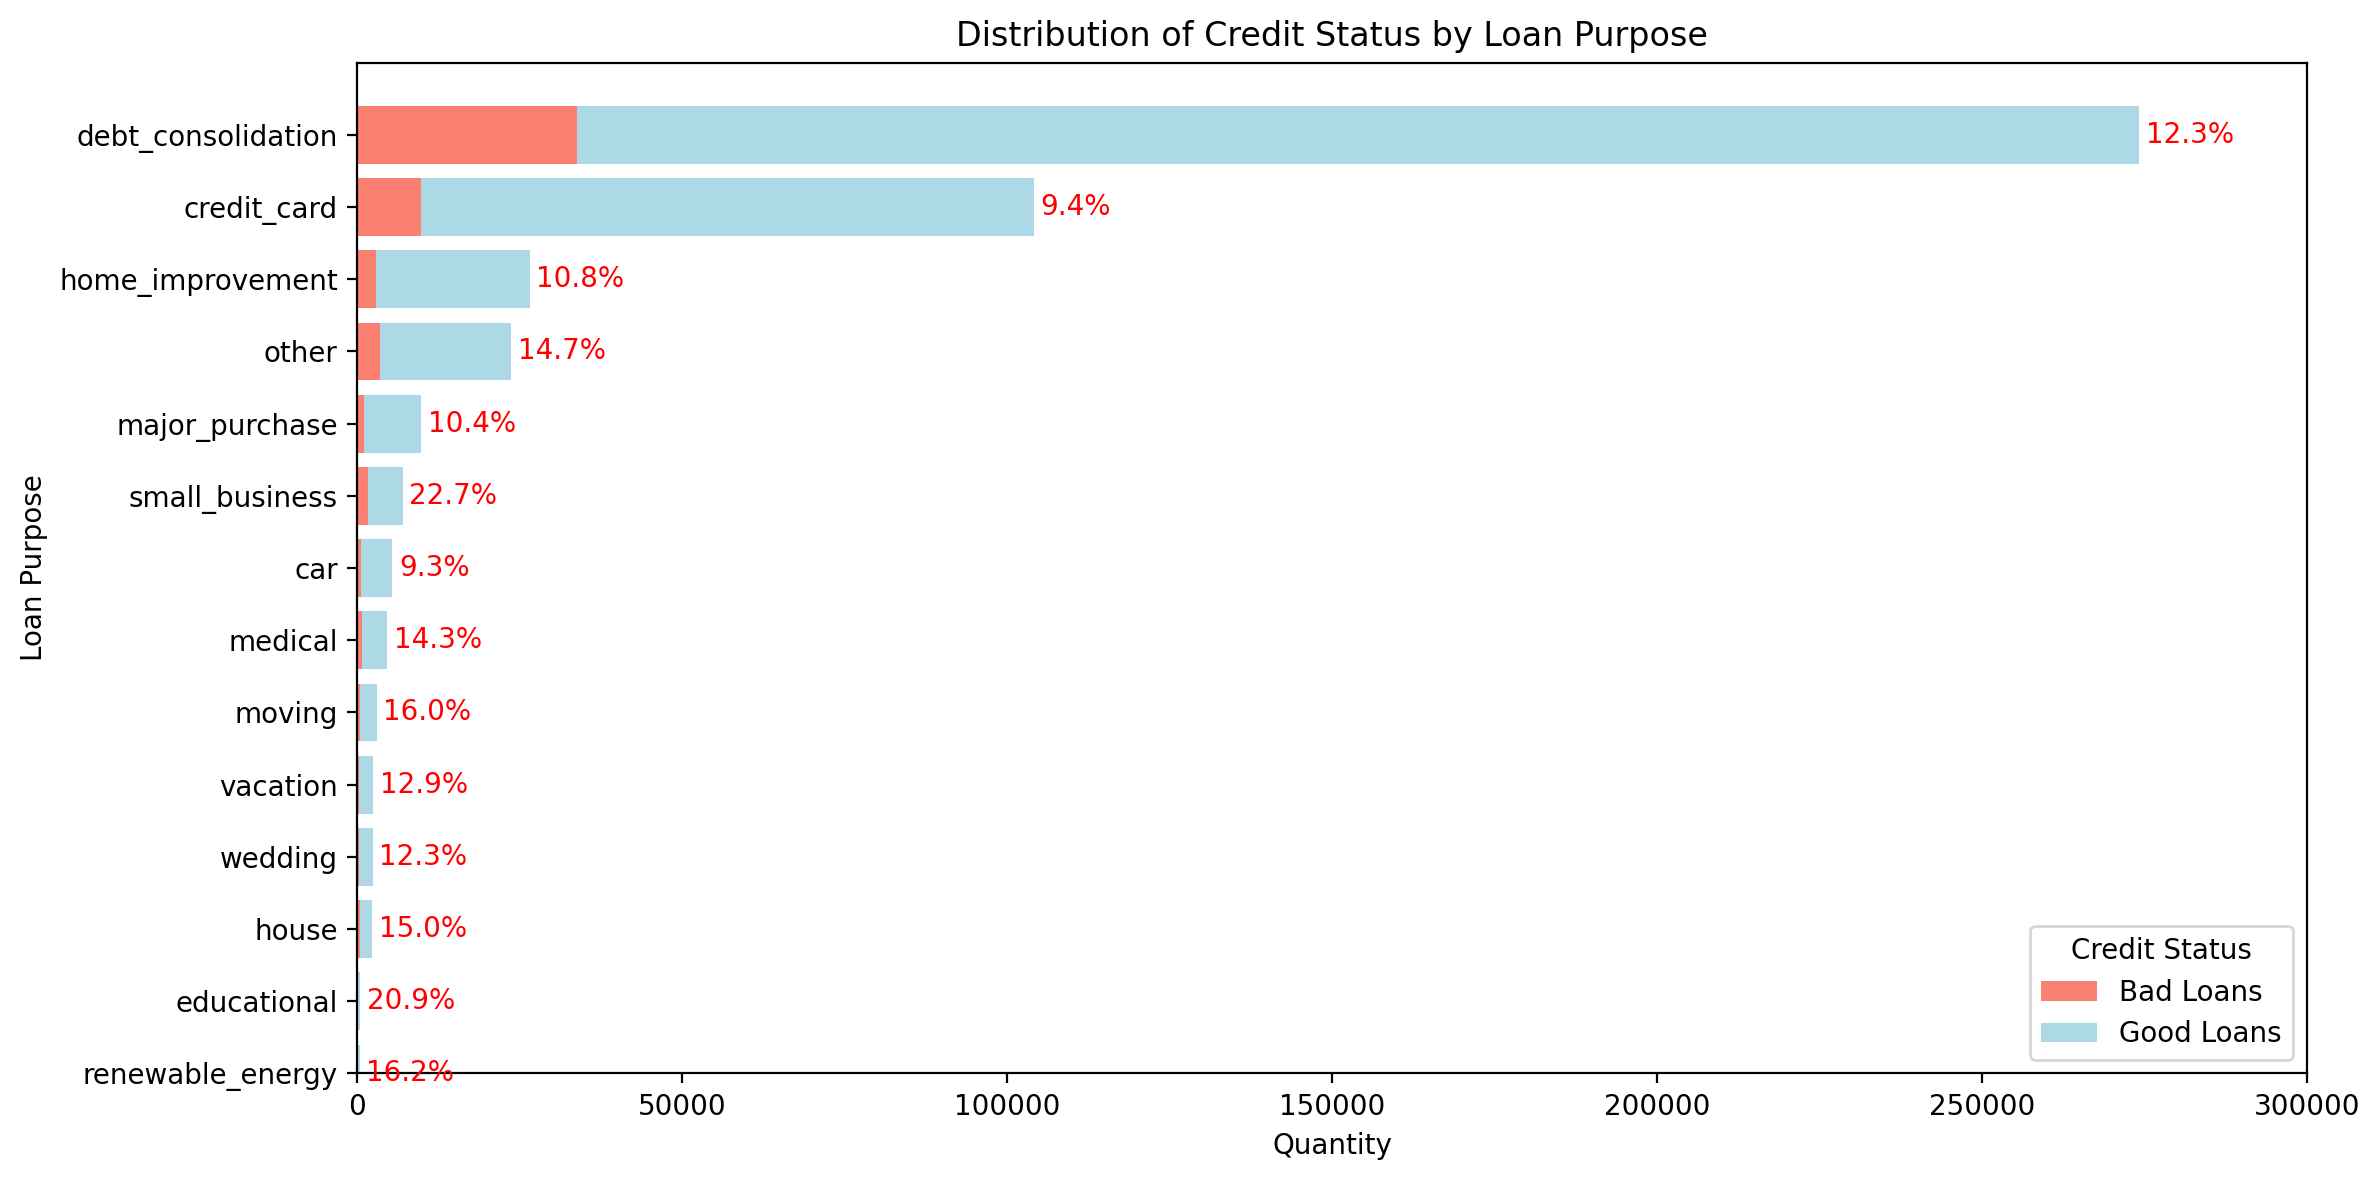

credit_flag,Bad Loans,Good Loans,Bad%,Good%
purpose,,,,
debt_consolidation,33812,240383,12.331370,87.668630
credit_card,9825,94332,9.432875,90.567125
other,3481,20209,14.693964,85.306036
home_improvement,2865,23672,10.796247,89.203753
small_business,1590,5423,22.672180,77.327820
major_purchase,1026,8802,10.439560,89.560440
medical,656,3946,14.254672,85.745328
car,504,4893,9.338521,90.661479
moving,480,2514,16.032064,83.967936


In [55]:
purpose_target_counts = df_da.groupby(['purpose', 'credit_flag']).size().unstack(fill_value=0) 
purpose_target_counts['Total'] = purpose_target_counts.sum(axis=1)
purpose_target_counts = purpose_target_counts.sort_values(by='Total', ascending=True)

purpose_target_counts_plot = purpose_target_counts.sort_values(by='Total', ascending=True)
purpose_target_counts = purpose_target_counts.drop(columns='Total')

fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
purpose_target_counts.plot(kind='barh', stacked=True, color=['salmon', 'lightblue'], width=0.8, ax=ax)

for i, row in enumerate(purpose_target_counts_plot.itertuples()):
    bad_percentage = (row[1] / (row[1] + row[2]) * 100)
    plt.text(row[1] + row[2] + 1000, i, f'{bad_percentage:.1f}%', 
             va='center', ha='left', fontsize=10, color='red')

plt.title('Distribution of Credit Status by Loan Purpose')
plt.xlabel('Quantity')
plt.ylabel('Loan Purpose')
plt.legend(title='Credit Status', loc='lower right')
plt.grid(False)
ax.set_xlim(0, 300000)
ax.set_ylim(0, 14)
plt.tight_layout()
#plt.savefig('Distribusi status kredit Nasabah berdasarkan tujuan pinjaman.png', dpi=300, bbox_inches='tight')
plt.show()

purpose_target_counts['Bad%'] = purpose_target_counts['Bad Loans']/(purpose_target_counts['Bad Loans']+purpose_target_counts['Good Loans'])*100
purpose_target_counts['Good%'] = purpose_target_counts['Good Loans']/(purpose_target_counts['Bad Loans']+purpose_target_counts['Good Loans'])*100
purpose_target_counts.sort_values(by= 'Bad Loans', ascending=False)

he majority of loans are taken for debt consolidation, which also shows the highest number of both good and bad loans. This indicates that debt consolidation is the most common reason customers seek loans.

Following that, credit card and home improvement purposes also represent significant portions of the loan portfolio, with relatively fewer bad loans compared to debt consolidation.

Other purposes such as major purchase, small business, car, and medical have much smaller loan volumes but still show a presence of both good and bad loans.

From a risk perspective, since debt consolidation has the largest volume and also a noticeable number of bad loans, it should be a key focus area for credit risk management. Monitoring and possibly tightening lending criteria for this category could help reduce defaults.


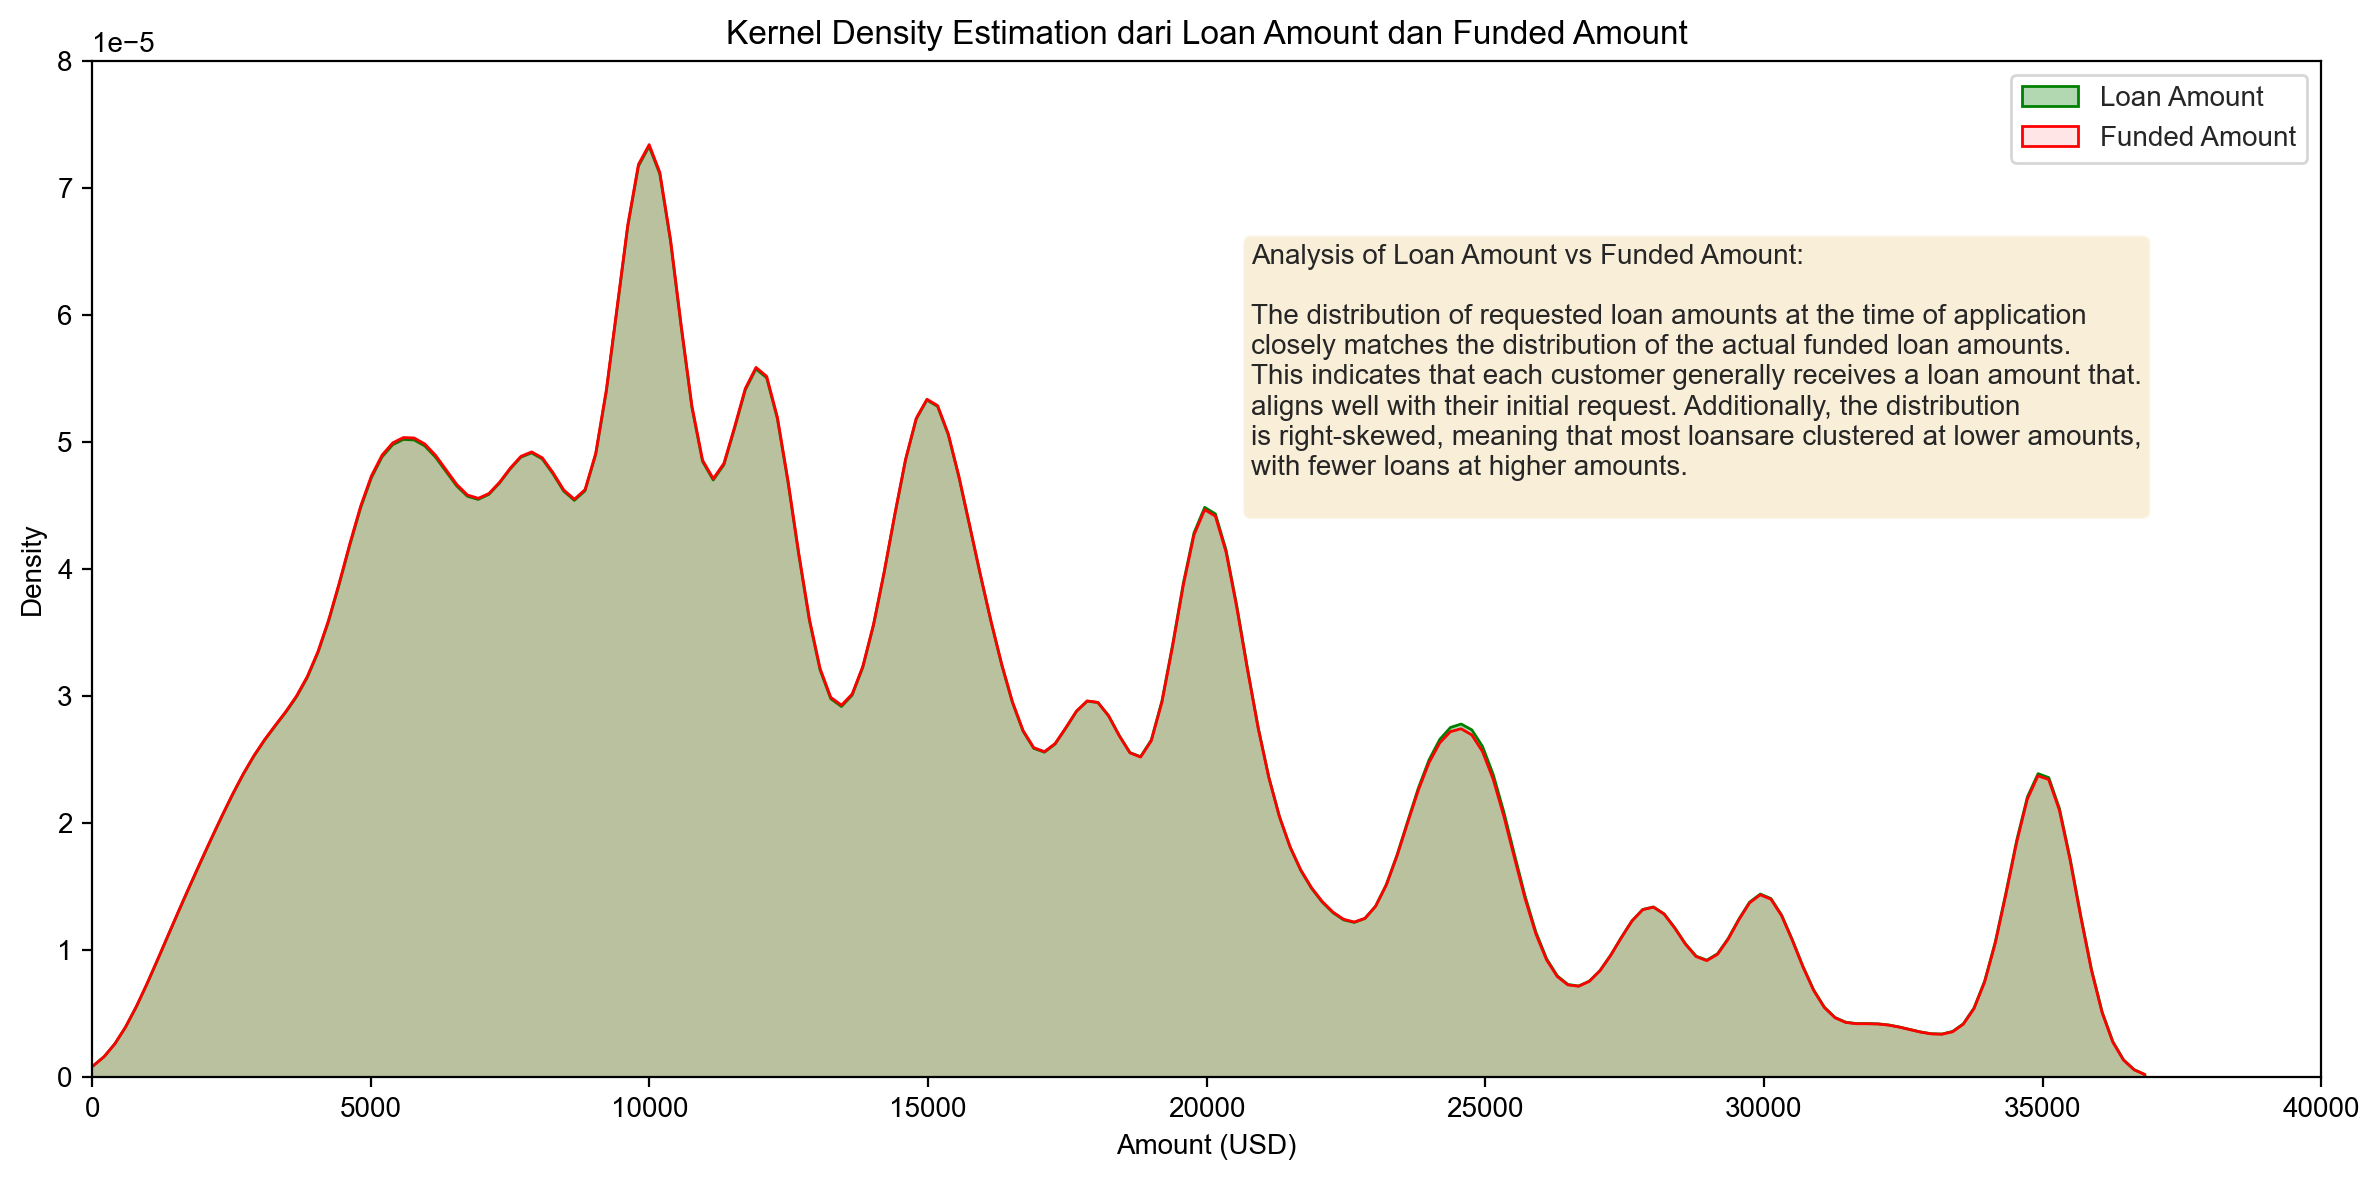

In [56]:
# Membuat figure dan axis
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

# KDE Plot
sns.set_style('whitegrid')
sns.kdeplot(data=df_da, x='loan_amnt', fill=True, alpha=0.3, label='Loan Amount', color='green', ax=ax)
sns.kdeplot(data=df_da, x='funded_amnt', fill=True, alpha=0.1, label='Funded Amount', color='red', ax=ax)

# Menambahkan box deskripsi
desc_text = (
    'Analysis of Loan Amount vs Funded Amount:\n\n'
    f'The distribution of requested loan amounts at the time of application\n'
    f'closely matches the distribution of the actual funded loan amounts.\n'
    f'This indicates that each customer generally receives a loan amount that.\n'
    f'aligns well with their initial request. Additionally, the distribution\n'
    f'is right-skewed, meaning that most loansare clustered at lower amounts,\n'
    f'with fewer loans at higher amounts.\n'
)

# Membuat box untuk deskripsi
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.52, 0.82, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

# Menyesuaikan tampilan plot
ax.set_title('Kernel Density Estimation dari Loan Amount dan Funded Amount')
ax.set_xlabel('Amount (USD)')
ax.set_ylabel('Density')
ax.legend()
ax.grid(False)
ax.set_xlim(0, 40000)
ax.set_ylim(0, 8e-5)

plt.tight_layout()
#plt.savefig('Perbandingan Loan Amount vs Funded Amount.png', dpi=300, bbox_inches='tight')
plt.show()


The majority of loans are taken for debt consolidation, which also shows the highest number of both good and bad loans. This indicates that debt consolidation is the most common reason customers seek loans.

Following that, credit card and home improvement purposes also represent significant portions of the loan portfolio, with relatively fewer bad loans compared to debt consolidation.

Other purposes such as major purchase, small business, car, and medical have much smaller loan volumes but still show a presence of both good and bad loans.

From a risk perspective, since debt consolidation has the largest volume and also a noticeable number of bad loans, it should be a key focus area for credit risk management. Monitoring and possibly tightening lending criteria for this category could help reduce defaults.

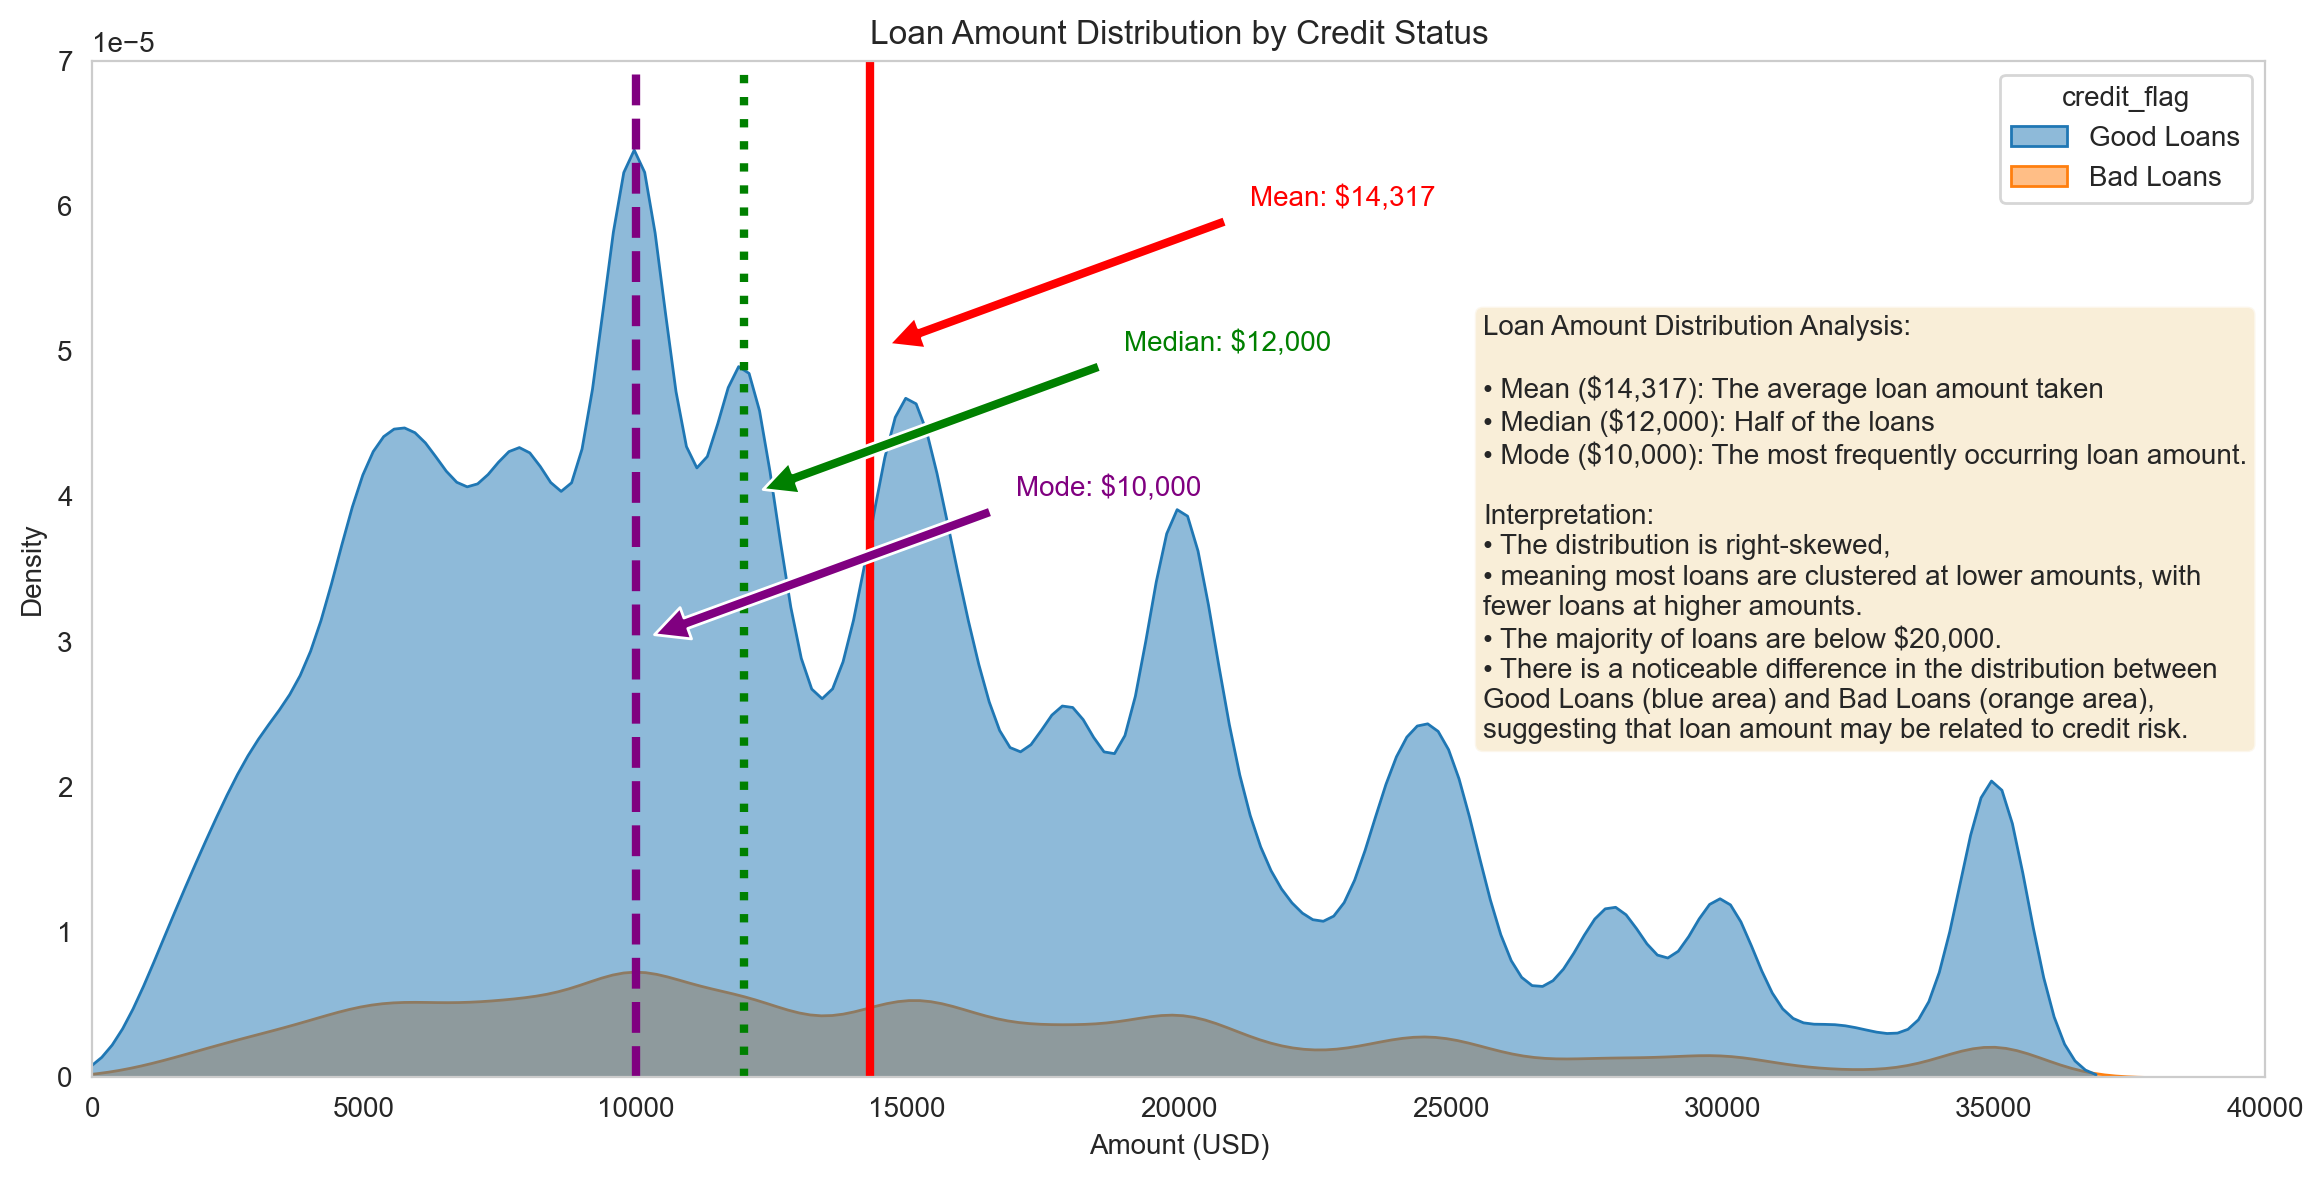

In [57]:
# Membuat garis mean dan median
mean_loan = df_da['loan_amnt'].mean()
median_loan = df_da['loan_amnt'].median()
mode_loan = df_da['loan_amnt'].mode()[0]

# KDE Plot
plt.figure(figsize=(12, 6), dpi=200)
kde_plot = sns.kdeplot(data=df_da, x='loan_amnt', hue='credit_flag', fill=True, alpha=0.5)

# Membuat garis statistik
plt.axvline(mean_loan, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(median_loan, color='g', linestyle='dotted', linewidth=3, label='Median')
plt.axvline(mode_loan, color='purple', linestyle='dashed', linewidth=3, label='Modus')

# Menambahkan anak panah dan teks untuk setiap statistik
plt.annotate(f'Mean: ${mean_loan:,.0f}', 
            xy=(mean_loan, 5e-5), 
            xytext=(mean_loan+7000, 6e-5),
            arrowprops=dict(facecolor='red', shrink=0.05),
            color='red')

plt.annotate(f'Median: ${median_loan:,.0f}', 
            xy=(median_loan, 4e-5), 
            xytext=(median_loan+7000, 5e-5),
            arrowprops=dict(facecolor='green', shrink=0.05),
            color='green')

plt.annotate(f'Mode: ${mode_loan:,.0f}', 
            xy=(mode_loan, 3e-5), 
            xytext=(mode_loan+7000, 4e-5),
            arrowprops=dict(facecolor='purple', shrink=0.05),
            color='purple')

# Menambahkan box deskripsi
desc_text = (
    'Loan Amount Distribution Analysis:\n\n'
    f'• Mean (${mean_loan:,.0f}): The average loan amount taken\n'
    f'• Median (${median_loan:,.0f}): Half of the loans\n'
    f'• Mode (${mode_loan:,.0f}): The most frequently occurring loan amount.\n\n'
    'Interpretation:\n'
    '• The distribution is right-skewed,\n'
    '• meaning most loans are clustered at lower amounts, with\nfewer loans at higher amounts.\n'
    '• The majority of loans are below $20,000.\n'    
    '• There is a noticeable difference in the distribution between\nGood Loans (blue area) and Bad Loans (orange area),\n'
    'suggesting that loan amount may be related to credit risk.'
)

# Membuat box untuk deskripsi
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.64, 0.75, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

# Menyesuaikan tampilan plot
plt.title('Loan Amount Distribution by Credit Status')
plt.xlabel('Amount (USD)')
plt.ylabel('Density')
plt.grid(False)
plt.xlim(0, 40000)
plt.ylim(0, 7e-5)

plt.tight_layout()
#plt.savefig('Pola Jumlah Pinjaman dengan status kreditnya.png', dpi=300, bbox_inches='tight')
plt.show()


Most of loans are at lower amounts (Half of total loans under $12.000) with the most frequent loans at $10.000

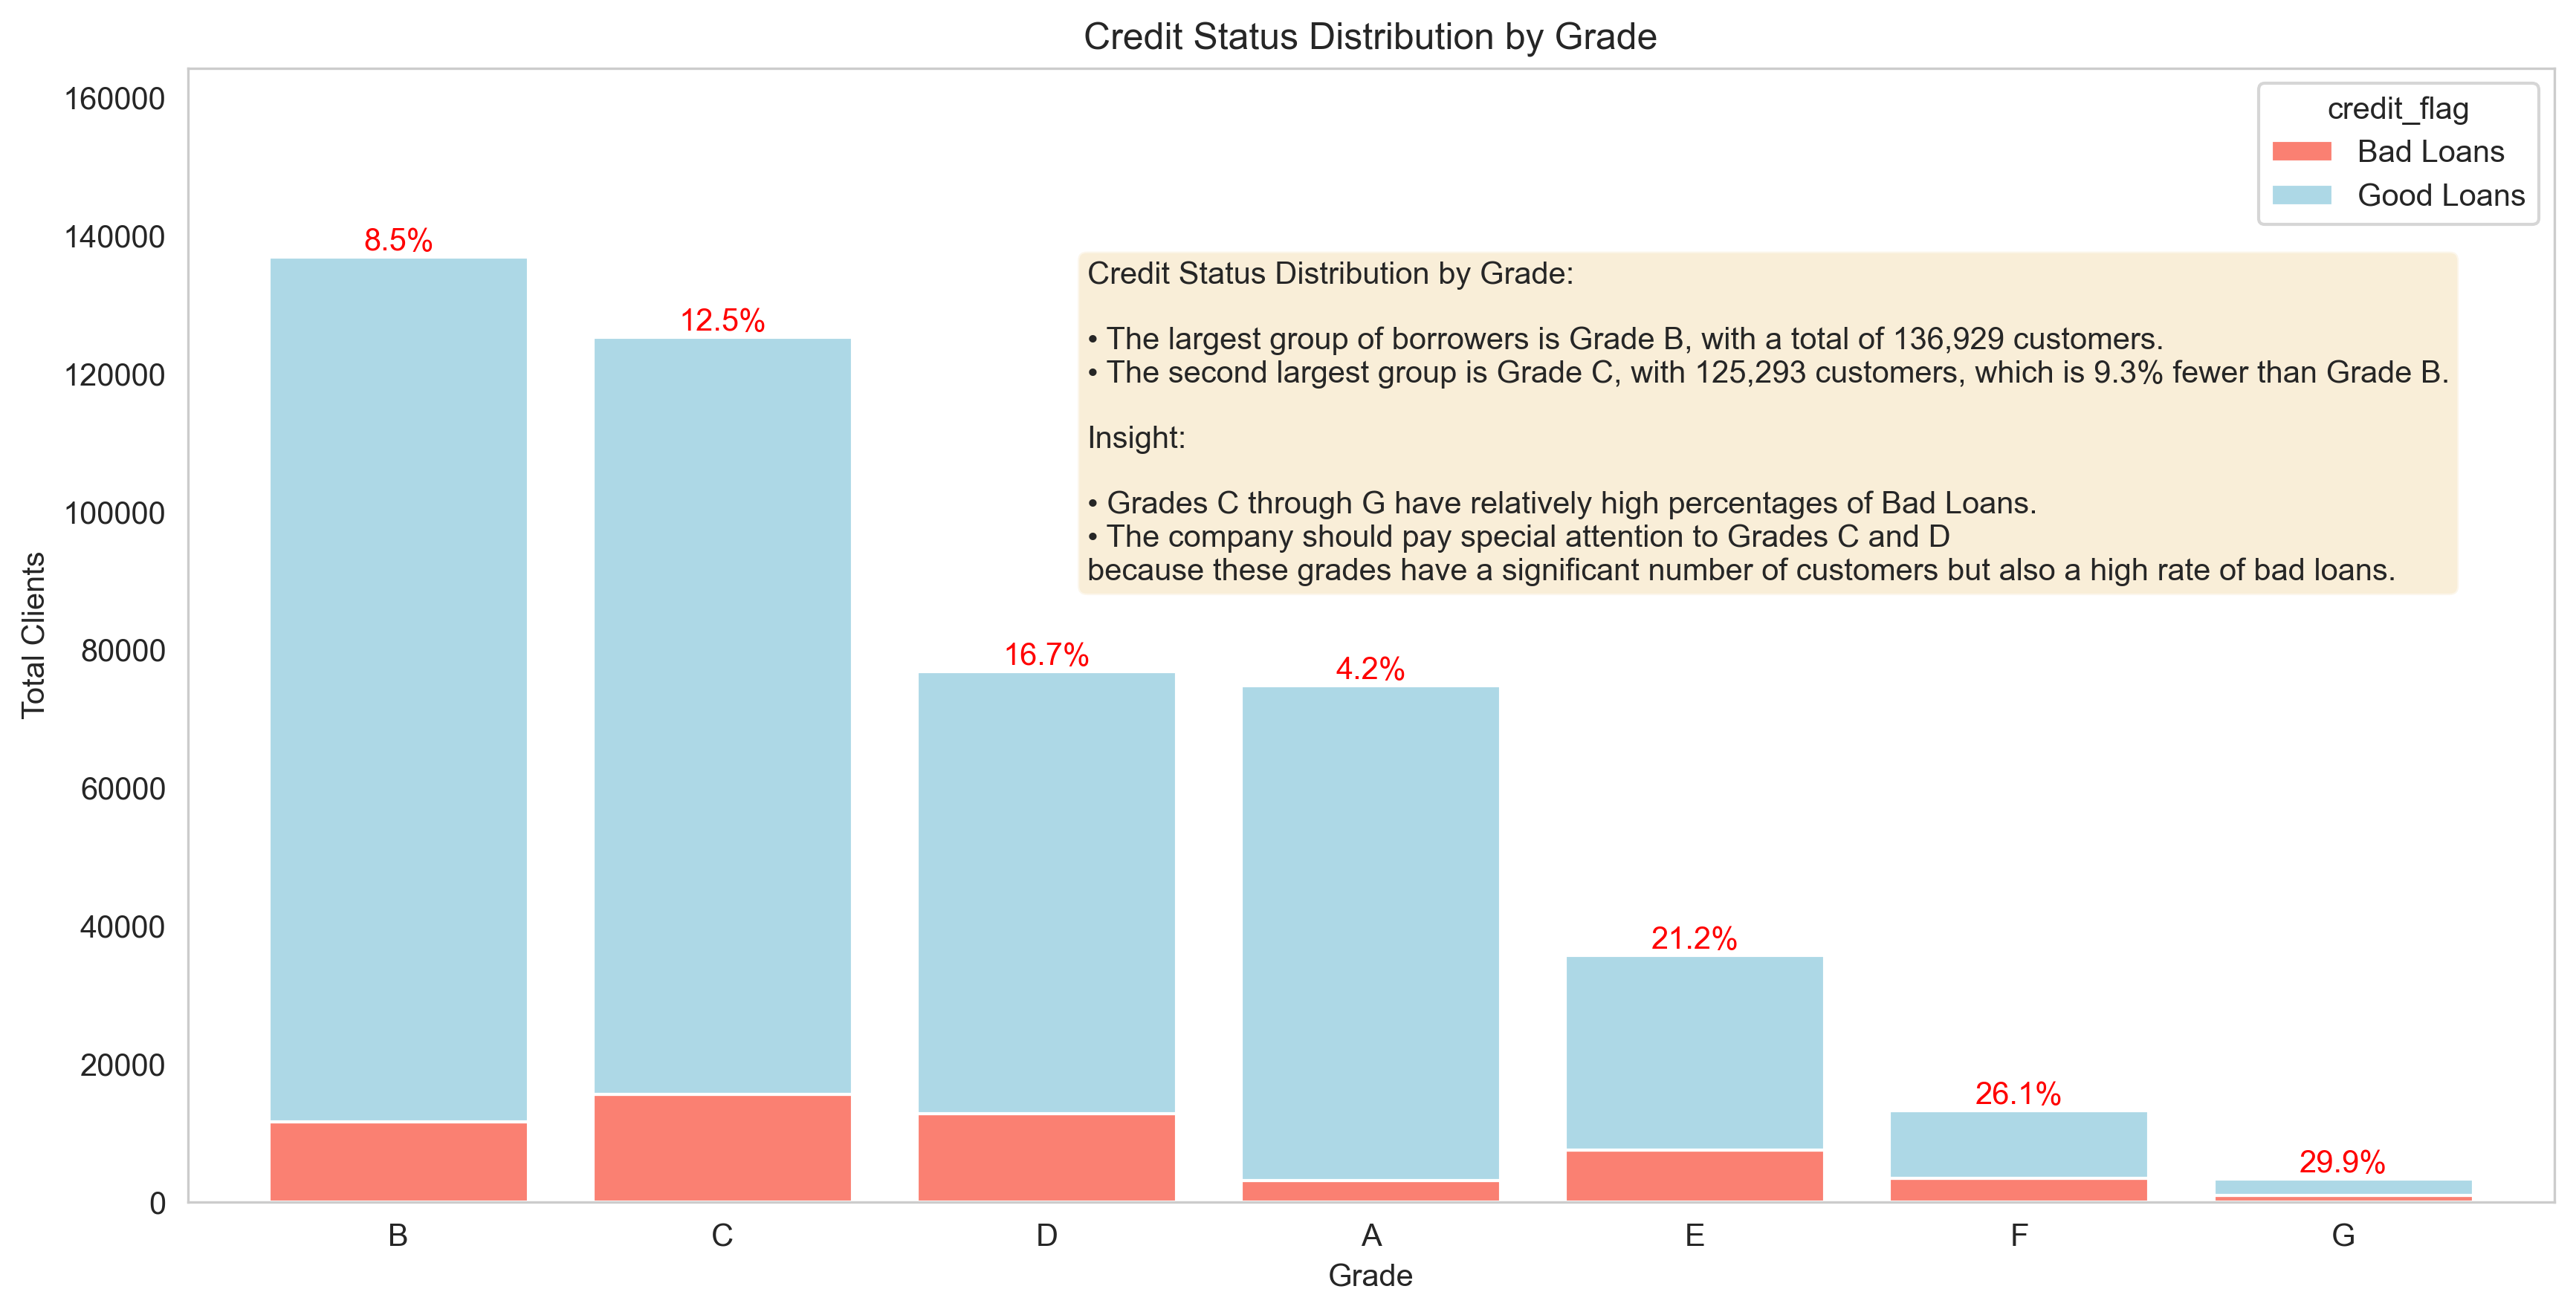

credit_flag,Bad Loans,Good Loans,Bad%,Good%,total
grade,,,,,
B,11689,125240,8.536541,91.463459,136929
C,15643,109650,12.485135,87.514865,125293
A,3131,71736,4.182083,95.817917,74867
D,12845,64043,16.706118,83.293882,76888
E,7581,28176,21.201443,78.798557,35757
F,3451,9778,26.086628,73.913372,13229
G,992,2330,29.861529,70.138471,3322


In [58]:
# Menghitung jumlah GOOD dan BAD berdasarkan grade
grade_target_counts = df_da.groupby(['grade', 'credit_flag']).size().unstack(fill_value=0) 
grade_target_counts['Total'] = grade_target_counts.sum(axis=1)
grade_target_counts = grade_target_counts.sort_values(by='Total', ascending=False)

grade_target_counts_plot = grade_target_counts.sort_values(by='Total', ascending=False)
grade_target_counts = grade_target_counts.drop(columns='Total')

# Membuat plot dengan ukuran yang lebih kecil
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)  # Mengurangi ukuran dan menambahkan dpi
grade_target_counts.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'], width=0.8, ax=ax)

# Menambahkan persentase
for i, row in enumerate(grade_target_counts.itertuples()):
    bad_percentage = (row[1] / (row[1] + row[2]) * 100)
    plt.text(i, row[1] + row[2] + 100, f'{bad_percentage:.1f}%', 
             va='bottom', ha='center', fontsize=10, color='red')

# Menambahkan box deskripsi
desc_text = (
    'Credit Status Distribution by Grade:\n\n'
    f'• The largest group of borrowers is Grade B, with a total of 136,929 customers.\n'
    f'• The second largest group is Grade C, with 125,293 customers, which is 9.3% fewer than Grade B.\n\n'
    'Insight:\n\n'
    f'• Grades C through G have relatively high percentages of Bad Loans.\n'
    f'• The company should pay special attention to Grades C and D\nbecause these grades have a significant number of customers but also a high rate of bad loans.'
)

# Membuat box untuk deskripsi
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.38, 0.83, desc_text,
         transform=plt.gca().transAxes,
         fontsize=10,
         verticalalignment='top',
         bbox=props)

plt.title('Credit Status Distribution by Grade')
plt.xlabel('Grade')
plt.ylabel('Total Clients')
plt.grid(False)

plt.subplots_adjust(bottom=0.15)
plt.xticks(rotation=0)

# Menyesuaikan batas axis
plt.ylim(0, grade_target_counts_plot['Total'].max() * 1.2)

plt.tight_layout()
#plt.savefig('Distribusi status kredit Nasabah berdasarkan grade.png', dpi=300, bbox_inches='tight')
plt.show()

# Menghitung persentase
grade_target_counts['Bad%'] = grade_target_counts['Bad Loans']/(grade_target_counts['Bad Loans']+grade_target_counts['Good Loans'])*100
grade_target_counts['Good%'] = grade_target_counts['Good Loans']/(grade_target_counts['Bad Loans']+grade_target_counts['Good Loans'])*100
grade_target_counts['total'] = grade_target_counts['Bad Loans'] + grade_target_counts['Good Loans']
grade_target_counts = grade_target_counts.sort_values(by='Good Loans', ascending=False)
grade_target_counts

The chart shows that most borrowers fall into Grades B and C, which also represent the largest loan volumes. While Grade B has the highest number of customers, the credit risk (bad loan rate) is notably higher starting from Grade C and below, reaching nearly 30% for Grade G.

This means that although Grade B customers are the main target due to their volume, the company must carefully manage the risk associated with Grades C and D, which have both a large customer base and high default rates. For Grades E, F, and G, despite smaller customer numbers, the risk of default is very high, requiring stricter risk mitigation strategies.

From a business perspective, risk management should balance maintaining loan volume in Grade B while controlling high-risk exposure in lower grades to keep the credit portfolio healthy.

# Data Preprocessing

## Check Missing Values

In [59]:
def check_na_values(df):    
    check_na = df.isna().sum() * 100 / len(df)

    missing_values = check_na[check_na > 0].sort_values(ascending=False)

    print(f'Percentage of missing values in each column:\n{missing_values}')

check_na_values(df)

Percentage of missing values in each column:
mths_since_last_record            86.566585
mths_since_last_delinq            53.690554
mnths_since_next_pymnt_d          48.728567
emp_length_int                     4.505399
mnths_since_last_pymnt_d           0.080637
revol_util                         0.072917
collections_12_mths_ex_med         0.031097
mnths_since_last_credit_pull_d     0.009007
delinq_2yrs                        0.006219
pub_rec                            0.006219
inq_last_6mths                     0.006219
open_acc                           0.006219
acc_now_delinq                     0.006219
total_acc                          0.006219
mnths_since_earliest_cr_line       0.006219
annual_inc                         0.000858
dtype: float64


Missing values with more than 60% is considered does not giving a much information for machine learning so it will be drop while others will be imputated.

In [60]:
def handling_na(df):
    # Drop columns
    df.drop(['mths_since_last_record'], axis=1, inplace=True)

    # Fillna with median
    df['annual_inc'].fillna(df['annual_inc'].median(), inplace=True)

    # Fillna with -1
    df['mths_since_last_delinq'].fillna(-1, inplace=True)

    # Fillna with 0
    df.fillna(0, inplace=True)

    return df

df_cleaned_na = handling_na(df.copy())
check_na_values(df_cleaned_na)

Percentage of missing values in each column:
Series([], dtype: float64)


## Check Duplicated Data

In [61]:
df_cleaned_na.duplicated().sum()

np.int64(0)

There are no duplicated data

## Outliers

Outliers will not be removed initially to preserve the dataset's authenticity. We want to avoid excessively altering the original data.

## Label Encoding

In [62]:
df_cleaned_na.select_dtypes(include='object').head()

,grade,home_ownership,verification_status,loan_status,purpose,addr_state,initial_list_status,credit_flag
0,B,RENT,Verified,Fully Paid,credit_card,AZ,f,Good Loans
1,C,RENT,Source Verified,Charged Off,car,GA,f,Bad Loans
2,C,RENT,Not Verified,Fully Paid,small_business,IL,f,Good Loans
3,C,RENT,Source Verified,Fully Paid,other,CA,f,Good Loans
4,B,RENT,Source Verified,Current,other,OR,f,Good Loans


In [63]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_cleaned_na.copy()
le = LabelEncoder()
encoding_results = []

categorical_cols = df_encoded.select_dtypes(include='object').columns
for col in categorical_cols:
    unique_before = df_encoded[col].unique()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    unique_after = df_encoded[col].unique()
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    for category, encoded in mapping.items():
        encoding_results.append([col, category, encoded])


encoding_df = pd.DataFrame(encoding_results, columns=['Column', 'Category Before', 'Category After'])
encoding_df

,Column,Category Before,Category After
0,grade,A,0
1,grade,B,1
2,grade,C,2
3,grade,D,3
4,grade,E,4
5,grade,F,5
6,grade,G,6
7,home_ownership,ANY,0
8,home_ownership,MORTGAGE,1
9,home_ownership,NONE,2


## Handling Imbalance Data

In [64]:
df_ml_ready = df_encoded.copy()

In [65]:
100 * df_ml_ready['credit_flag'].value_counts(normalize=True)

credit_flag
1    88.133438
0    11.866562
Name: proportion, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_ml_ready.drop(['credit_flag'],axis=1)
y = df_ml_ready['credit_flag']

oversampling = SMOTE(random_state=42, sampling_strategy=1)

Due to the computer's performance, there are various sampling method but We choose to do oversampling because we want to keep the number of data (by not reducing them to minority)

In [67]:
X, y = oversampling.fit_resample(X, y)

In [68]:
y.value_counts()

credit_flag
1    410953
0    410953
Name: count, dtype: int64

## Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of Train data: {X_train.shape}')
print(f'Shape of Test data: {X_test.shape}')

Shape of Train data: (657524, 30)
Shape of Test data: (164382, 30)


## Standardization


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [71]:
X_train_scaled.head(2)

,loan_amnt,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mnths_since_earliest_cr_line,mnths_since_issue_d,mnths_since_last_pymnt_d,mnths_since_next_pymnt_d,mnths_since_last_credit_pull_d
0,1.200603,-0.737109,-1.043215,3.261555,1.321228,-0.448838,-0.717609,-0.605809,-0.962899,2.291258,1.024984,-0.479384,0.604653,1.858657,0.382322,0.713710,1.032967,-0.564592,1.553493,-0.225616,-0.341526,-0.089379,-0.061672,0.674659,-0.709982,1.709491,-0.669271,-0.772621,1.048418,-0.535458
1,0.164021,-0.737109,0.626305,-0.201659,0.052948,-0.846923,-0.283073,0.420131,-0.793978,-0.387519,-0.833838,-0.761408,-0.214263,-0.342659,-0.014198,0.536606,-1.069014,-0.564592,-0.571987,-0.225616,0.557336,-0.089379,-0.061672,0.077964,-0.152911,-0.987507,0.465323,0.379454,-0.741498,-0.125073


# Modelling

In [72]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Initialize model
model = LogisticRegression(max_iter=1000)

# Set start time
start_time = time.time()

# Training model
model.fit(X_train_scaled, y_train)

# Predict data test
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Set end time
end_time = time.time()
elapsed_time = end_time - start_time

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# DataFrame for results
results_df = pd.DataFrame({
    'nama model': ['Logistic Regression'],
    'accuracy': [accuracy],
    'precision': [precision],
    'recall': [recall],
    'roc auc': [roc_auc],
    'time': [elapsed_time]
})

print(results_df)


            nama model  accuracy  precision    recall   roc auc      time
0  Logistic Regression  0.831259   0.794569  0.894619  0.915499  1.068666


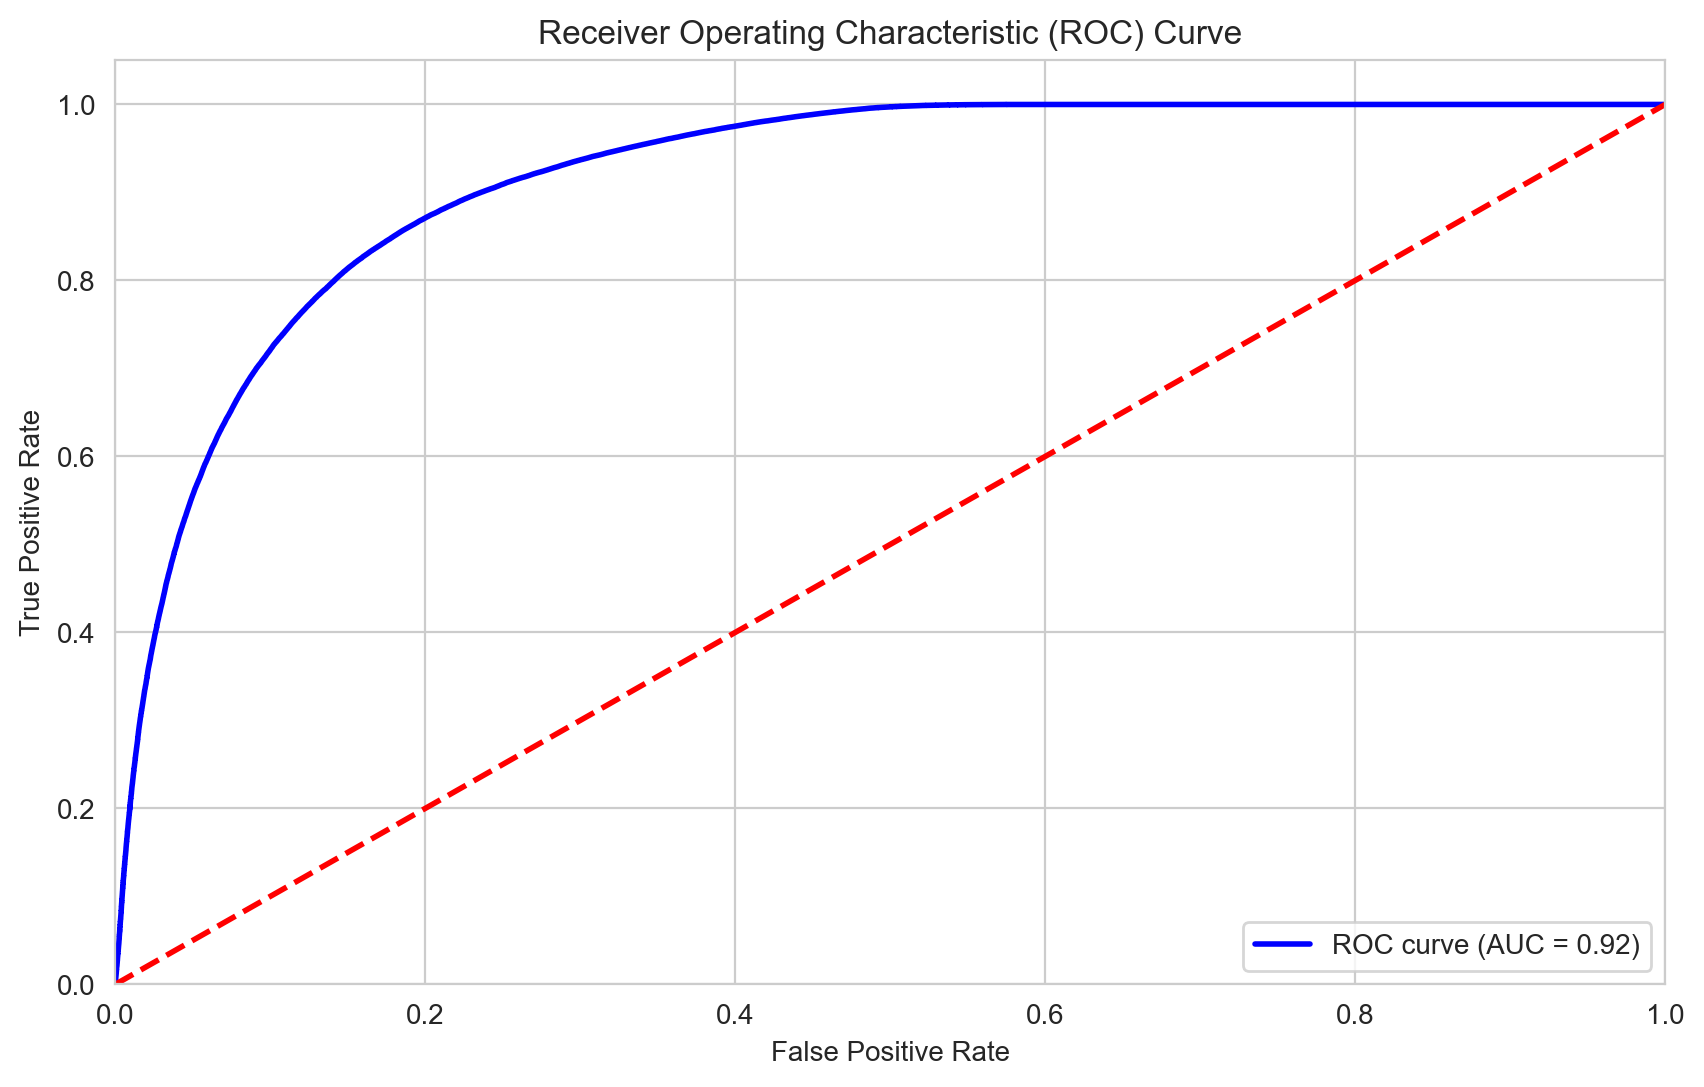

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_train_scaled)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_prob)
roc_auc = roc_auc_score(y_train, y_prob)

# Plot ROC curve
plt.figure(figsize=(10, 6), dpi=200)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

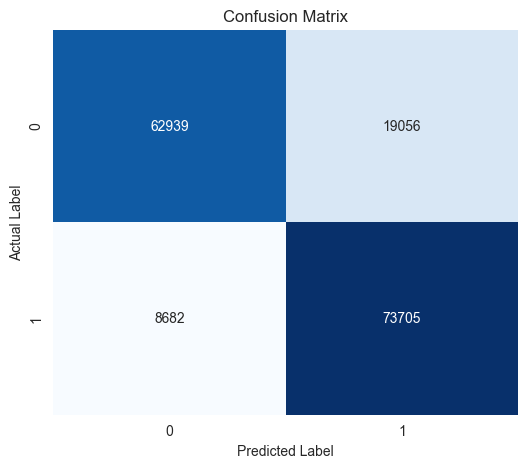

In [74]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels, classes):
    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    
    # Create a DataFrame for better visualization with class labels
    cm_df = pd.DataFrame(cm, index=classes, columns=classes)
    
    plt.figure(figsize=(6, 5))
    
    # Plot heatmap with annotations inside cells
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    plt.show()

# Example usage:
plot_confusion_matrix(y_test, y_pred, classes=[0,1])
